# Points of Interest (POI) da Overture Maps

## 0. Configurazione dell'ambiente
Le librerie utilizzate nel seguente progetto, specificate nel file requirements.txt, devono essere installate e importate come segue.

In [ ]:
# Selezione del notebook
platform = 'colab' #@param ['colab', 'jupyter_notebook']

# Selezione del dispositivo di calcolo per l'esecuzione
device = 'cpu' # @param ['cpu', 'cuda']

print(f'Running on "{platform}" using "{device}" device!')

Running on "colab" using "cpu" device!


### 0.1 Installazione delle librerie

#### 0.1.1 Installazione delle librerie tramite Google Colab

In [ ]:
if platform == 'colab':
    !pip install geopandas
    !pip install folium
    !pip install shapely
    !pip install duckdb
    !pip install jupysql --no-warn-script-location
    !pip install duckdb-engine --no-warn-script-location
    !pip install geopy

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95.1/95.1 kB 3.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 192.8/192.8 kB 8.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.7/49.7 kB 2.0 MB/s eta 0:00:00


### 0.1.2 Installazione delle librerie tramite Jupyter Notebook
Per l'utilizzo di Jupyter Notebook √® necessario scaricare il file requirements.txt ed eseguirlo tramite il comando riportato di seguito.

In [ ]:
pip install -r ../requirements.txt  --no-warn-script-location

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'


### 0.2 Import delle librerie

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import shapely
import duckdb
from geopy.geocoders import Nominatim
import time
import json

## 1. Dataset

### 1.1 Configurazione di Google Drive per Google Colab

In [ ]:
# Collegamento a Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### 1.2 Configurazione di DuckDB

Caricamento dell'estensione SQL per il notebook

In [ ]:
%load_ext sql

Creazione della connessione DuckDB in modo esplicito e assegnazione dell'alias per JupySQL

In [ ]:
conn = duckdb.connect('/content/drive/MyDrive/OvertureMaps/overture_maps_data.db')

In [ ]:
%sql conn

Installazione e caricamento delle estensioni

In [ ]:
%%sql
INSTALL spatial;
INSTALL httpfs;
LOAD spatial;
LOAD httpfs;

Running query in 'DuckDBPyConnection'

+---------+
| Success |
+---------+
+---------+

Configurazione della regione AWS (Amazon Web Services)

In [ ]:
%sql SET s3_region='us-west-2';

Running query in 'DuckDBPyConnection'

+---------+
| Success |
+---------+
+---------+

Configurazione per la visualizzazione dell'output

In [ ]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

Comando da utilizzare per annullare la transazione abortita a causa di un errore a runtime

In [ ]:
%%sql
ROLLBACK;

TransactionException: TransactionContext Error: cannot rollback - no transaction is active

Chiusura della connessione per sincronizzare la sessione

In [ ]:
conn.close()

### 1.3 Caricamento del database

#### 1.3.1 Query di prova

In [ ]:
%%sql
SELECT *
FROM read_parquet('s3://overturemaps-us-west-2/release/2025-02-19.0/theme=places/*/*')
WHERE addresses[1].country = 'IT' AND addresses[1].locality ILIKE 'Milano'
LIMIT 3;

id  \
0  08f8e62c50383b8803fcf09567974e40   
1  08f98f0b29285aea03652e222d82119b   
2  08f489ac041b5b32030f50bb7abb55ce   

                                            geometry  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   

                                                bbox  version  \
0  {'xmin': -76.99663543701172, 'xmax': -76.99662...        0   
1  {'xmin': -7.7469072341918945, 'xmax': -7.74690...        0   
2  {'xmin': -96.86514282226562, 'xmax': -96.86512...        0   

                                             sources  \
0  [{'property': '', 'dataset': 'meta', 'record_i...   
1  [{'property': '', 'dataset': 'meta', 'record_i...   
2  [{'property': '', 'dataset': 'meta', 'record_i...   

                                               names  \
0  {'primary': 'Arteinparete Deco', 'common': Non...   
1  {'primary': 'IFDM', 'common': None, 'rules': N...   
2  {'primary': 'Spazio Benessere IEO', 'common': ...   

                                          categories  confidence  \
0  {'primary': 'art_gallery', 'alternate': ['home...    0.794118   
1  {'primary': 'print_media', 'alternate': ['medi...    0.784615   
2  {'primary': 'beauty_and_spa', 'alternate': ['c...    0.621434   

                              websites  \
0       [http://www.arteinparete.com/]   
1            [http://www.ifdm.design/]   
2  [https://bit.ly/SpazioBenessereIeo]   

                                      socials emails           phones brand  \
0  [https://www.facebook.com/467046626673669]   <NA>  [+393884958913]  <NA>   
1      [https://www.facebook.com/48784411852]   <NA>             <NA>  <NA>   
2  [https://www.facebook.com/100209162220057]   <NA>  [+393519878993]  <NA>   

                                           addresses   theme   type  
0  [{'freeform': 'Via dei Transiti, 6', 'locality...  places  place  
1  [{'freeform': 'Bastioni di Porta Venezia, 9', ...  places  place  
2  [{'freeform': 'Via Giuseppe Ripamonti, 435', '...  places  place

In [ ]:
%%sql result <<
SELECT *
FROM read_parquet('s3://overturemaps-us-west-2/release/2025-02-19.0/theme=places/*/*')
WHERE array_length(array_filter(addresses, (address) -> address.country = 'IT' AND address.locality ILIKE 'Milano')) > 0
LIMIT 3;

In [ ]:
display(result)

id  \
0  08f8e62c50383b8803fcf09567974e40   
1  08f98f0b29285aea03652e222d82119b   
2  08f489ac041b5b32030f50bb7abb55ce   

                                            geometry  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   

                                                bbox  version  \
0  {'xmin': -76.99663543701172, 'xmax': -76.99662...        0   
1  {'xmin': -7.7469072341918945, 'xmax': -7.74690...        0   
2  {'xmin': -96.86514282226562, 'xmax': -96.86512...        0   

                                             sources  \
0  [{'property': '', 'dataset': 'meta', 'record_i...   
1  [{'property': '', 'dataset': 'meta', 'record_i...   
2  [{'property': '', 'dataset': 'meta', 'record_i...   

                                               names  \
0  {'primary': 'Arteinparete Deco', 'common': Non...   
1  {'primary': 'IFDM', 'common': None, 'rules': N...   
2  {'primary': 'Spazio Benessere IEO', 'common': ...   

                                          categories  confidence  \
0  {'primary': 'art_gallery', 'alternate': ['home...    0.794118   
1  {'primary': 'print_media', 'alternate': ['medi...    0.784615   
2  {'primary': 'beauty_and_spa', 'alternate': ['c...    0.621434   

                              websites  \
0       [http://www.arteinparete.com/]   
1            [http://www.ifdm.design/]   
2  [https://bit.ly/SpazioBenessereIeo]   

                                      socials emails           phones brand  \
0  [https://www.facebook.com/467046626673669]   <NA>  [+393884958913]  <NA>   
1      [https://www.facebook.com/48784411852]   <NA>             <NA>  <NA>   
2  [https://www.facebook.com/100209162220057]   <NA>  [+393519878993]  <NA>   

                                           addresses   theme   type  
0  [{'freeform': 'Via dei Transiti, 6', 'locality...  places  place  
1  [{'freeform': 'Bastioni di Porta Venezia, 9', ...  places  place  
2  [{'freeform': 'Via Giuseppe Ripamonti, 435', '...  places  place

#### 1.3.2 Ottenimento dei POI da Overture Maps

Categorie del dataset utili per analisi supplementari (prova del download)

In [ ]:
%%sql
COPY (
    SELECT
        id,
        geometry,
        CAST(names AS JSON) AS names,
        CAST(categories AS JSON) AS categories,
        confidence,
        CAST(addresses AS JSON) AS addresses
    FROM read_parquet('s3://overturemaps-us-west-2/release/2025-02-19.0/theme=places/*/*')
    WHERE
        array_length(array_filter(addresses, (address) -> address.country = 'IT' AND address.locality ILIKE 'Milano')) > 0
    LIMIT 3
) TO '/content/drive/MyDrive/OvertureMaps/sample_milano_places.csv'
WITH (HEADER, DELIMITER ',');

Count
0      3

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OvertureMaps/sample_milano_places.csv')
display(df)

id                         geometry  \
0  08f8e62c50383b8803fcf09567974e40  POINT (-76.9966292 -12.1384177)   
1  08f98f0b29285aea03652e222d82119b   POINT (-7.7469063 -19.3050656)   
2  08f489ac041b5b32030f50bb7abb55ce       POINT (-96.86513 30.70976)   

                                               names  \
0  {"primary":"Arteinparete Deco","common":null,"...   
1      {"primary":"IFDM","common":null,"rules":null}   
2  {"primary":"Spazio Benessere IEO","common":nul...   

                                          categories  confidence  \
0  {"primary":"art_gallery","alternate":["home_im...    0.794118   
1  {"primary":"print_media","alternate":["media_n...    0.784615   
2  {"primary":"beauty_and_spa","alternate":["cosm...    0.621434   

                                           addresses  
0  [{"freeform":"Via dei Transiti, 6","locality":...  
1  [{"freeform":"Bastioni di Porta Venezia, 9","l...  
2  [{"freeform":"Via Giuseppe Ripamonti, 435","lo...

In [ ]:
%%sql
COPY (
    SELECT
        id,
        geometry,
        CAST(names AS JSON) AS names,
        CAST(categories AS JSON) AS categories,
        confidence,
        CAST(addresses AS JSON) AS addresses
    FROM read_parquet('s3://overturemaps-us-west-2/release/2025-02-19.0/theme=places/*/*')
    WHERE
        array_length(array_filter(addresses, (address) -> address.country = 'IT' AND address.locality ILIKE 'Milano')) > 0
    LIMIT 3
) TO '/content/drive/MyDrive/OvertureMaps/sample_milano_places_map.geojson'
WITH (FORMAT GDAL, DRIVER 'GeoJSON', SRS 'EPSG:4326');

Count
0      3

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/OvertureMaps/sample_milano_places_map.geojson')
display(gdf)

id  \
0  08f8e62c50383b8803fcf09567974e40   
1  08f98f0b29285aea03652e222d82119b   
2  08f489ac041b5b32030f50bb7abb55ce   

                                               names  \
0  { "primary": "Arteinparete Deco", "common": nu...   
1  { "primary": "IFDM", "common": null, "rules": ...   
2  { "primary": "Spazio Benessere IEO", "common":...   

                                          categories  confidence  \
0  { "primary": "art_gallery", "alternate": [ "ho...    0.794118   
1  { "primary": "print_media", "alternate": [ "me...    0.784615   
2  { "primary": "beauty_and_spa", "alternate": [ ...    0.621434   

                                           addresses  \
0  [ { "freeform": "Via dei Transiti, 6", "locali...   
1  [ { "freeform": "Bastioni di Porta Venezia, 9"...   
2  [ { "freeform": "Via Giuseppe Ripamonti, 435",...   

                      geometry  
0  POINT (-76.99663 -12.13842)  
1   POINT (-7.74691 -19.30507)  
2   POINT (-96.86513 30.70976)

Analisi delle coordinate

In [ ]:
%%sql
SELECT
    CASE
        WHEN ST_X(geometry) BETWEEN 9.0 AND 9.3 AND ST_Y(geometry) BETWEEN 45.3 AND 45.6
        THEN 'Coordinate corrette'
        ELSE 'Coordinate errate'
    END AS stato_coordinate,
    COUNT(*) AS numero_luoghi
FROM read_parquet('s3://overturemaps-us-west-2/release/2025-02-19.0/theme=places/*/*')
WHERE array_length(array_filter(addresses, (address) -> address.country = 'IT' AND address.locality ILIKE 'Milano')) > 0
GROUP BY stato_coordinate;

stato_coordinate  numero_luoghi
0    Coordinate errate            216
1  Coordinate corrette          58271

Dataset completo (salvataggio su Drive del database)

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS places (
    id STRING,
    geometry GEOMETRY,
    version INTEGER,
    sources JSON,
    names JSON,
    categories JSON,
    confidence DOUBLE,
    websites JSON,
    socials JSON,
    emails JSON,
    phones JSON,
    brand JSON,
    addresses JSON
);

Empty DataFrame
Columns: [Count]
Index: []

In [ ]:
%%sql
INSERT INTO places
SELECT
    id,
    geometry,
    version,
    CAST(sources AS JSON) AS sources,
    CAST(names AS JSON) AS names,
    CAST(categories AS JSON) AS categories,
    confidence,
    CAST(websites AS JSON) AS websites,
    CAST(socials AS JSON) AS socials,
    CAST(emails AS JSON) AS emails,
    CAST(phones AS JSON) AS phones,
    CAST(brand AS JSON) AS brand,
    CAST(addresses AS JSON) AS addresses
FROM read_parquet('s3://overturemaps-us-west-2/release/2025-02-19.0/theme=places/*/*')
WHERE array_length(array_filter(addresses, (address) -> address.country = 'IT' AND address.locality ILIKE 'Milano')) > 0;

Count
0  58487

Correzione delle coordinate errate

In [ ]:
%%sql
SELECT COUNT(*) FROM places;

count_star()
0        350847

In [ ]:
%%sql
SELECT *
FROM places
LIMIT 3;

id  \
0  08f8e62c50383b8803fcf09567974e40   
1  08f98f0b29285aea03652e222d82119b   
2  08f489ac041b5b32030f50bb7abb55ce   

                                            geometry  version  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...        0   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...        0   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...        0   

                                             sources  \
0  [{"property":"","dataset":"meta","record_id":"...   
1  [{"property":"","dataset":"meta","record_id":"...   
2  [{"property":"","dataset":"meta","record_id":"...   

                                               names  \
0  {"primary":"Arteinparete Deco","common":null,"...   
1      {"primary":"IFDM","common":null,"rules":null}   
2  {"primary":"Spazio Benessere IEO","common":nul...   

                                          categories  confidence  \
0  {"primary":"art_gallery","alternate":["home_im...    0.794118   
1  {"primary":"print_media","alternate":["media_n...    0.784615   
2  {"primary":"beauty_and_spa","alternate":["cosm...    0.621434   

                                websites  \
0       ["http://www.arteinparete.com/"]   
1            ["http://www.ifdm.design/"]   
2  ["https://bit.ly/SpazioBenessereIeo"]   

                                        socials emails             phones  \
0  ["https://www.facebook.com/467046626673669"]   None  ["+393884958913"]   
1      ["https://www.facebook.com/48784411852"]   None               None   
2  ["https://www.facebook.com/100209162220057"]   None  ["+393519878993"]   

  brand                                          addresses  
0  None  [{"freeform":"Via dei Transiti, 6","locality":...  
1  None  [{"freeform":"Bastioni di Porta Venezia, 9","l...  
2  None  [{"freeform":"Via Giuseppe Ripamonti, 435","lo...

In [ ]:
%%sql wrong_addresses <<
SELECT id, addresses, geometry
FROM places
WHERE
    CAST(addresses[0]->>'country' AS STRING) = 'IT'
    AND CAST(addresses[0]->>'locality' AS STRING) ILIKE 'Milano'
    AND (ST_X(geometry) NOT BETWEEN 9.0 AND 9.3 OR ST_Y(geometry) NOT BETWEEN 45.3 AND 45.6);

In [ ]:
print(wrong_addresses.shape)

(216, 3)


Utilizzo di Nominatim per ottenere in automatico le coordinate a partire dagli indirizzi

In [ ]:
geolocator = Nominatim(user_agent="Geocoding s.carbone17@campus.unimib.it)", timeout=10)
updated_data = []
new_addresses_count = 0
wrong_addresses_count = 0

for row in wrong_addresses.iterrows():
    id_value = row[1]['id']
    address = json.loads(row[1]['addresses'])
    address_str = address[0]['freeform'] + ", " + address[0]['locality'] + ", " + address[0]['postcode'] + ", " + address[0]['country']

    location = geolocator.geocode(address_str)
    if location:
        new_addresses_count += 1
        updated_data.append((id_value, location.latitude, location.longitude))
    else:
        wrong_addresses_count += 1

    time.sleep(1.5)

print(f"Numero di coordinate ottenute: {new_addresses_count}.")
print(f"Numero di coordinate ancora errate: {wrong_addresses_count}.")

Numero di coordinate ottenute: 194.
Numero di coordinate ancora errate: 22.


Aggiornamento delle coordinate ottenute

In [ ]:
df_updates = pd.DataFrame(updated_data, columns=["id", "longitude", "latitude"])

In [ ]:
conn.sql("CREATE TABLE temp_updates AS SELECT * FROM df_updates")

In [ ]:
%%sql
UPDATE places
SET geometry = ST_Point(temp_updates.latitude, temp_updates.longitude)
FROM temp_updates
WHERE places.id = temp_updates.id;

Count
0   1144

In [ ]:
%%sql
SELECT
    CASE
        WHEN ST_X(geometry) BETWEEN 9.0 AND 9.3 AND ST_Y(geometry) BETWEEN 45.3 AND 45.6
        THEN 'Coordinate corrette'
        ELSE 'Coordinate errate'
    END AS stato_coordinate,
    COUNT(*) AS numero_luoghi
FROM places
GROUP BY stato_coordinate;

stato_coordinate  numero_luoghi
0  Coordinate corrette         350792
1    Coordinate errate             55

In [ ]:
%%sql
DROP TABLE IF EXISTS temp_updates;

Empty DataFrame
Columns: [Success]
Index: []

Gestione manuale dei dati con coordinate ancora errate

In [ ]:
%%sql
SELECT id, names, addresses, ST_X(geometry), ST_Y(geometry)
FROM places
WHERE NOT (ST_X(geometry) BETWEEN 9.0 AND 9.3 AND ST_Y(geometry) BETWEEN 45.3 AND 45.6);

id  \
0   08f1e8321b28143303449410223d9261   
1   08f1f9817401bd1e03e04e4651aad519   
2   08f1f99c8ea06c88037e9a3cd8e9df6c   
3   08f1f99c51b1340e03767799cad1a79a   
4   08f1f9993221ab5b032b795d558a9c78   
5   08f1e8321b28143303449410223d9261   
6   08f1f9817401bd1e03e04e4651aad519   
7   08f1f99c8ea06c88037e9a3cd8e9df6c   
8   08f1f99c51b1340e03767799cad1a79a   
9   08f1f9993221ab5b032b795d558a9c78   
10  08f1e8321b28143303449410223d9261   
11  08f1f9817401bd1e03e04e4651aad519   
12  08f1f99c8ea06c88037e9a3cd8e9df6c   
13  08f1f99c51b1340e03767799cad1a79a   
14  08f1f9993221ab5b032b795d558a9c78   
15  08f1e8321b28143303449410223d9261   
16  08f1f9817401bd1e03e04e4651aad519   
17  08f1f99c8ea06c88037e9a3cd8e9df6c   
18  08f1f99c51b1340e03767799cad1a79a   
19  08f1f9993221ab5b032b795d558a9c78   
20  08f1e8321b28143303449410223d9261   
21  08f1f9817401bd1e03e04e4651aad519   
22  08f1f99c8ea06c88037e9a3cd8e9df6c   
23  08f1f99c51b1340e03767799cad1a79a   
24  08f1f9993221ab5b032b795d558a9c78   
25  08f6d693050420a903d8dc9a14652b7d   
26  08f7b48d16c70b7203d9e47e8434e3d8   
27  08f1f986f614b8c003e6cec49f5e0030   
28  08f1ea2d937248d503c0edc1cb1cc696   
29  08f3f26190bb471903ba34413997d0ea   
30  08f1e8624963171203cad59f37e01220   
31  08f1e8321b28143303449410223d9261   
32  08f1ea201230642e03f59c8f6ee4f00e   
33  08f1ea32b00a8add03363d222d0bc1bb   
34  08f1f9817401bd1e03e04e4651aad519   
35  08f1f9836526339e03275f45ebbb673e   
36  08f1f99db454830803df2c15a2d08843   
37  08f1f982682a356a034203cd227acb52   
38  08f1f99c8ea06c88037e9a3cd8e9df6c   
39  08f1f995695568e003c937af4fcb04f9   
40  08f1f9956952c284031bace16697bd70   
41  08f1f9956952c28403a7adf2b4c1ea4b   
42  08f1f99c51b1340e03767799cad1a79a   
43  08f1f99c5d4c4c54034ac53d8c9e61bb   
44  08f1f991b181a682037dcb2ba0cd8e1a   
45  08f1f991b18c298c030cfd3726bde0e8   
46  08f1f991b1125312037dae1ed25a507f   
47  08f1f991b181d6a003a2c77feac136c3   
48  08f1f99185030aa403ba7a030dee4e91   
49  08f1f9972512160603ae06bdf6f912b0   
50  08f1f99d663a8ce00377eb727e90bfee   
51  08f1f99d6621b41a03c01a716c59cf8c   
52  08f1f9993221ab5b032b795d558a9c78   
53  08f1f8eaf24e924803f8eecc82c76b08   
54  08f1ea422910512d034db04844fa6a18   

                                                names  \
0   {"primary":"Angels & Demons","common":null,"ru...   
1       {"primary":"HADO","common":null,"rules":null}   
2   {"primary":"Studio Baccani E Associati","commo...   
3   {"primary":"WWG Software Company","common":nul...   
4   {"primary":"Azienda Agricola San Martino","com...   
5   {"primary":"Angels & Demons","common":null,"ru...   
6       {"primary":"HADO","common":null,"rules":null}   
7   {"primary":"Studio Baccani E Associati","commo...   
8   {"primary":"WWG Software Company","common":nul...   
9   {"primary":"Azienda Agricola San Martino","com...   
10  {"primary":"Angels & Demons","common":null,"ru...   
11      {"primary":"HADO","common":null,"rules":null}   
12  {"primary":"Studio Baccani E Associati","commo...   
13  {"primary":"WWG Software Company","common":nul...   
14  {"primary":"Azienda Agricola San Martino","com...   
15  {"primary":"Angels & Demons","common":null,"ru...   
16      {"primary":"HADO","common":null,"rules":null}   
17  {"primary":"Studio Baccani E Associati","commo...   
18  {"primary":"WWG Software Company","common":nul...   
19  {"primary":"Azienda Agricola San Martino","com...   
20  {"primary":"Angels & Demons","common":null,"ru...   
21      {"primary":"HADO","common":null,"rules":null}   
22  {"primary":"Studio Baccani E Associati","commo...   
23  {"primary":"WWG Software Company","common":nul...   
24  {"primary":"Azienda Agricola San Martino","com...   
25  {"primary":"Grupo Pampa","common":null,"rules"...   
26  {"primary":"Sister Island","common":null,"rule...   
27  {"primary":"SOS Grandine e Genyio","common":nu...   
28   {"primary":"Spacest","common":null,"rules":null}   
29  {"primary":"Mitepek.it","common":null,"rules":...   
30  {"primary":"Ken Foods 

In [ ]:
new_data = []
data_to_eliminate = []

new_data.append(('08f6d693050420a903d8dc9a14652b7d', 45.489444, 9.167222))
new_data.append(('08f7b48d16c70b7203d9e47e8434e3d8', 45.4725, 9.153333))
new_data.append(('08f1f986f614b8c003e6cec49f5e0030', 45.4575, 9.187222))
new_data.append(('08f1ea2d937248d503c0edc1cb1cc696', 45.482222, 9.1975))
new_data.append(('08f3f26190bb471903ba34413997d0ea', 45.467778, 9.195556))

new_data.append(('08f1e8624963171203cad59f37e01220', 45.455556, 9.147222))
new_data.append(('08f1e8321b28143303449410223d9261', 45.458056, 9.188611))
new_data.append(('08f1ea201230642e03f59c8f6ee4f00e', 45.468333, 9.195833))
new_data.append(('08f1ea32b00a8add03363d222d0bc1bb', 45.467778, 9.195556))
new_data.append(('08f1f9817401bd1e03e04e4651aad519', 45.475556, 9.216667))

data_to_eliminate.append('08f1f9836526339e03275f45ebbb673e') #Turbigo
data_to_eliminate.append('08f1f99db454830803df2c15a2d08843') #Ferno (Varese)
data_to_eliminate.append('08f1f982682a356a034203cd227acb52') #Abbiategrasso
new_data.append(('08f1f99c8ea06c88037e9a3cd8e9df6c', 45.472778, 9.194722))
data_to_eliminate.append('08f1f995695568e003c937af4fcb04f9') #Buccinasco

data_to_eliminate.append('08f1f9956952c284031bace16697bd70') #Buccinasco
data_to_eliminate.append('08f1f9956952c28403a7adf2b4c1ea4b') #Buccinasco
new_data.append(('08f1f99c51b1340e03767799cad1a79a', 45.465, 9.196667))
new_data.append(('08f1f99c5d4c4c54034ac53d8c9e61bb', 45.496944, 9.197778))
data_to_eliminate.append('08f1f991b181a682037dcb2ba0cd8e1a') #Carugate

data_to_eliminate.append('08f1f991b18c298c030cfd3726bde0e8') #Carugate
data_to_eliminate.append('08f1f991b1125312037dae1ed25a507f') #Buccinasco
data_to_eliminate.append('08f1f991b181d6a003a2c77feac136c3') #Carugate
data_to_eliminate.append('08f1f99185030aa403ba7a030dee4e91') #Gessate
new_data.append(('08f1f9972512160603ae06bdf6f912b0', 45.465833, 9.198889))

data_to_eliminate.append('08f1f99d663a8ce00377eb727e90bfee') #Baggio
new_data.append(('08f1f99d6621b41a03c01a716c59cf8c', 45.467778, 9.195556))
new_data.append(('08f1f9993221ab5b032b795d558a9c78', 45.453056, 9.188333))
new_data.append(('08f1f8eaf24e924803f8eecc82c76b08', 45.478333, 9.194722))
new_data.append(('08f1ea422910512d034db04844fa6a18', 45.462778, 9.192778))

df_correct = pd.DataFrame(new_data, columns=["id", "longitude", "latitude"])
df_eliminate = pd.DataFrame(data_to_eliminate, columns=["id"])

In [ ]:
display(df_correct.shape)
display(df_eliminate.shape)

(18, 3)

(12, 1)

Aggiornamento delle nuove coordinate dei POI di Milano

In [ ]:
conn.sql("CREATE TABLE temp_correct AS SELECT * FROM df_correct")

In [ ]:
%%sql
UPDATE places
SET geometry = ST_Point(temp_correct.latitude, temp_correct.longitude)
FROM temp_correct
WHERE places.id = temp_correct.id;

Count
0    108

In [ ]:
%%sql
SELECT
    CASE
        WHEN ST_X(geometry) BETWEEN 9.0 AND 9.3 AND ST_Y(geometry) BETWEEN 45.3 AND 45.6
        THEN 'Coordinate corrette'
        ELSE 'Coordinate errate'
    END AS stato_coordinate,
    COUNT(*) AS numero_luoghi
FROM places
GROUP BY stato_coordinate;

stato_coordinate  numero_luoghi
0  Coordinate corrette         350835
1    Coordinate errate             12

Eliminazione dei POI esterni a Milano

In [ ]:
conn.sql("CREATE TABLE temp_eliminate AS SELECT * FROM df_eliminate")

In [ ]:
%%sql
DELETE FROM places
WHERE id IN (SELECT id FROM temp_eliminate);

Count
0     12

In [ ]:
%%sql
SELECT
    CASE
        WHEN ST_X(geometry) BETWEEN 9.0 AND 9.3 AND ST_Y(geometry) BETWEEN 45.3 AND 45.6
        THEN 'Coordinate corrette'
        ELSE 'Coordinate errate'
    END AS stato_coordinate,
    COUNT(*) AS numero_luoghi
FROM places
GROUP BY stato_coordinate;

stato_coordinate  numero_luoghi
0  Coordinate corrette         350835

In [ ]:
%%sql
DROP TABLE IF EXISTS temp_correct;
DROP TABLE IF EXISTS temp_eliminate;

Empty DataFrame
Columns: [Success]
Index: []

Ulteriore analisi della qualit√† dei dati

In [ ]:
%%sql
SELECT addresses[0]->>'region' AS region, COUNT(*)
FROM places
GROUP BY region;

region  count_star()
0     MI        298198
1   None             3
2     25         52631
3     MB             3

In [ ]:
%%sql
SELECT id, names, addresses
FROM places
WHERE (addresses[0]->>'region' = 'MB') OR (addresses[0]->>'region' IS NULL);

id  \
0  08f1f9950e370b52030914dbc9ac05d8   
1  08f1f9950e370b52031fa957bd0cfd7e   
2  08f1f99cf40563ae033144f676924875   
3  08f1f99c0dc552b003ad1408a2d83486   
4  08f1f99cdd45d5920382c229ad57f5a3   
5  08f1f99cdd45998e03435c2a376cf7bf   

                                               names  \
0  {"primary":"Hertz Autonoleggio - Milan Nova Mi...   
1  {"primary":"Hertz Milano Nova Milanese Leroy M...   
2  {"primary":"Endless Pools Italia","common":nul...   
3  {"primary":"ROAD MOVIE","common":null,"rules":...   
4  {"primary":"AMI PARIS","common":null,"rules":n...   
5  {"primary":"Officina Profumo - Farmaceutica di...   

                                           addresses  
0  [{"freeform":"S.S. 35 dei Giovi km 135","local...  
1  [{"freeform":"S.S. 35 dei Giovi km 135","local...  
2  [{"freeform":"Via Vincenzo Monti 8","locality"...  
3  [{"freeform":"VIA MAGENTA 30/B","locality":"Mi...  
4  [{"freeform":"Piazza del Duomo","locality":"Mi...  
5  [{"freeform":"Piazza del Duomo Rinascente","lo...

Eliminazione dei POI in provincia MB

In [ ]:
%%sql
DELETE FROM places
WHERE addresses[0]->>'region' = 'MB';

Count
0      3

Aggiornamento dei POI con campo region nullo

In [ ]:
df_region_null = conn.sql("SELECT id, addresses FROM places WHERE addresses[0]->>'region' IS NULL").df()
df_region_null['addresses'] = df_region_null['addresses'].str.replace('null', '"MI"')

In [ ]:
conn.sql("CREATE TABLE temp_region AS SELECT * FROM df_region_null")

In [ ]:
%%sql
UPDATE places
SET addresses = temp_region.addresses
FROM temp_region
WHERE places.id = temp_region.id;

Count
0     18

In [ ]:
%%sql
DROP TABLE IF EXISTS temp_region;

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
%%sql
SELECT addresses[0]->>'region' AS region, COUNT(*)
FROM places
GROUP BY region;

region  count_star()
0     MI        298201
1     25         52631

Uniformazione del campo region

In [ ]:
### TO-DO (da eseguire): 25 -> 'MI' oppure 'MI' -> 25 ???

In [ ]:
df_region_mod = conn.sql("SELECT id, addresses FROM places WHERE addresses[0]->>'region' = '25'").df()
df_region_mod['addresses'] = df_region_mod['addresses'].str.replace('"25"', '"MI"')

In [ ]:
conn.sql("CREATE TABLE temp_mod_region AS SELECT * FROM df_region_mod")

In [ ]:
%%sql
UPDATE places
SET addresses = temp_mod_region.addresses
FROM temp_mod_region
WHERE places.id = temp_mod_region.id;

Count
0  315786

In [ ]:
%%sql
DROP TABLE IF EXISTS temp_mod_region;

Empty DataFrame
Columns: [Success]
Index: []

Numero di places salvati

In [ ]:
%%sql
SELECT COUNT(*) AS num_places
FROM places

num_places
0      350832

Dataset completo (salvataggio su Drive dei file)

In [ ]:
%%sql
COPY places
TO '/content/drive/MyDrive/OvertureMaps/milano_places_map.geojson'
WITH (FORMAT GDAL, DRIVER 'GeoJSON', SRS 'EPSG:4326');

Count
0  350832

In [ ]:
%%sql
COPY places
TO '/content/drive/MyDrive/OvertureMaps/milano_places.csv'
WITH (HEADER, DELIMITER ',');

Count
0  350832

### 1.4 Descrizione del dataset
Un posto indica un punto di interesse (POI) nel mondo. In particolare, questa analisi si concentra sui POI presenti nella citt√† di Milano.

#### 1.4.1 Categorie
|Nome|Descrizione|Analisi|
|:---:|:---:|:---:|
|<b>id</b>|Codice identificativo del punto|S√¨|
|<b>geometry</b>|Coordinate del punto|S√¨|
|bbox|Bounding box che racchiude la geometria dell'oggetto|No|
|version|Versione del record|No|
|sources|Fonte del dato|No|
|<b>names</b>|Nomi (primary, common, rules)  del punto di interesse|S√¨|
|<b>categories</b>|Categorie di appartenenza|S√¨|
|<b>confidence</b>|Confidenza relativa alla correttezza del dato|S√¨|
|websites|Link a risorse web associate|No|
|socials|Link ai social media|No|
|emails|Lista di indirizzi e-mail|No|
|phones|Lista di numeri di telefono|No|
|brand|Marchio associato|No|
|<b>addresses</b>|Lista di indirizzi (freeform, locality, postcode, region, country)|S√¨|
|theme|Categoria generale (places)|No|
|type|Tipo di record (place)|No|


### 1.5 Analisi del dataset

#### 1.5.1 Analisi del campo categories

Definizione del dizionario con le categorie presenti nella documentazione di Overture Maps

In [ ]:
standard_categories = {
    'accommodation': {
        'bed_and_breakfast': {},
        'cabin': {},
        'campground': {},
        'cottage': {},
        'guest_house': {},
        'health_retreats': {},
        'holiday_rental_home': {},
        'hostel': {},
        'hotel': {},
        'inn': {},
        'lodge': {},
        'motel': {},
        'mountain_huts': {},
        'resort': {
            'beach_resort': {}
            },
        'rv_park': {},
        'service_apartments': {}
        },

    'active_life': {
        'sports_and_recreation_venue': {
            'adventure_sports_center': {},
            'american_football_field': {},
            'airsoft_fields': {},
            'archery_range': {},
            'atv_recreation_park': {},
            'badminton_court': {},
            'baseball_field': {},
            'basketball_court': {},
            'batting_cage': {},
            'beach_volleyball_court': {},
            'bicycle_path': {},
            'bocce_ball_court': {},
            'bowling_alley': {},
            'bubble_soccer_field': {},
            'disc_golf_course': {},
            'flyboarding_center': {},
            'futsal_field': {},
            'golf_course': {
                'driving_range': {},
                },
            'gym': {},
            'gymnastics_center': {},
            'handball_court': {},
            'hockey_field': {},
            'horse_riding': {
                'equestrian_facility': {},
                'horse_racing_track': {}
                },
            'skate_park': {},
            'skating_rink': {
                'ice_skating_rink': {},
                'roller_skating_rink': {}
                },
            'hang_gliding_center': {},
            'kiteboarding': {},
            'miniature_golf_course': {},
            'paddleboarding_center': {},
            'playground': {},
            'pool_billiards': {
                'pool_hall': {}
                },
            'racquetball_court': {},
            'rock_climbing_gym': {},
            'rugby_pitch': {},
            'shooting_range': {},
            'sky_diving': {},
            'soccer_field': {},
            'squash_court': {},
            'swimming_pool': {},
            'tennis_court': {},
            'trampoline_park': {},
            'tubing_provider': {},
            'volleyball_court': {},
            'wildlife_hunting_range': {},
            'zorbing_center': {},
            'diving_center': {
                'free_diving_center': {},
                'scuba_diving_center': {}
                },
            'race_track': {}
            },
        'sports_and_fitness_instruction': {
            'climbing_class': {},
            'cycling_classes': {},
            'golf_instructor': {},
            'paddleboarding_lessons': {},
            'racing_experience': {},
            'rock_climbing_instructor': {},
            'diving_instruction': {
                'free_diving_instruction': {},
                'scuba_diving_instruction': {}
                },
            'aerial_fitness_center': {},
            'barre_classes': {},
            'boot_camp': {},
            'boxing_class': {},
            'boxing_club': {},
            'boxing_gym': {},
            'cardio_classes': {},
            'dance_school': {},
            'ems_training': {},
            'fitness_trainer': {},
            'health_consultant': {},
            'meditation_center': {},
            'pilates_studio': {},
            'qi_gong_studio': {},
            'self_defense_classes': {},
            'ski_and_snowboard_school': {},
            'surfing_school': {},
            'swimming_instructor': {},
            'tai_chi_studio': {},
            'yoga_instructor': {},
            'yoga_studio': {}
            },
        'sports_club_and_league': {
            'amateur_sports_league': {},
            'amateur_sports_team': {},
            'beach_volleyball_club': {},
            'esports_league': {},
            'esports_team': {},
            'fencing_club': {},
            'fishing_club': {},
            'football_club': {},
            'go_kart_club': {},
            'gymnastics_club': {},
            'lawn_bowling_club': {},
            'nudist_clubs': {},
            'paddle_tennis_club': {},
            'professional_sports_league': {},
            'professional_sports_team': {},
            'rowing_club': {},
            'sailing_club': {},
            'school_sports_league': {},
            'school_sports_team': {},
            'soccer_club': {},
            'surf_lifesaving_club': {},
            'table_tennis_club': {},
            'volleyball_club': {},
            'golf_club': {
                'indoor_golf_center': {}
                },
            'martial_arts_club': {
                'brazilian_jiu_jitsu_club': {},
                'chinese_martial_arts_club': {},
                'karate_club': {},
                'kickboxing_club': {},
                'muay_thai_club': {},
                'taekwondo_club': {}
                }
            },
        'sports_and_recreation_rental_and_services': {
            'beach_equipment_rentals': {},
            'bike_rentals': {},
            'boat_hire_service': {
                'canoe_and_kayak_hire_service': {}
                },
            'scooter_rental': {},
            'sport_equipment_rentals': {}
            }
        },

    'arts_and_entertainment': {
        'adult_entertainment': {
            'erotic_massage': {},
            'strip_club': {},
            'striptease_dancer': {}
        },
        'arcade': {},
        'auditorium': {},
        'bar_crawl': {},
        'betting_center': {},
        'bingo_hall': {},
        'bookmakers': {},
        'cabaret': {},
        'carousel': {},
        'casino': {},
        'chamber_of_handicraft': {},
        'choir': {},
        'circus': {},
        'club_crawl': {},
        'comedy_club': {},
        'topic_concert_venue': {},
        'country_club': {},
        'country_dance_hall': {},
        'dance_club': {},
        'dinner_theater': {},
        'eatertainment': {},
        'escape_rooms': {},
        'exhibition_and_trade_center': {},
        'glass_blowing': {},
        'indoor_playcenter': {},
        'internet_cafe': {},
        'jazz_and_blues': {},
        'karaoke': {},
        'laser_tag': {},
        'makerspace': {},
        'marching_band': {},
        'music_venue': {},
        'musical_band_orchestras_and_symphonies': {},
        'opera_and_ballet': {},
        'paint_and_sip': {},
        'paintball': {},
        'performing_arts': {},
        'planetarium': {},
        'rodeo': {},
        'salsa_club': {},
        'wildlife_sanctuary': {},
        'stadium_arena': {
            'baseball_stadium': {},
            'basketball_stadium': {},
            'cricket_ground': {},
            'football_stadium': {},
            'hockey_arena': {},
            'rugby_stadium': {},
            'soccer_stadium': {},
            'tennis_stadium': {},
            'track_stadium': {}
        },
        'studio_taping': {},
        'theaters_and_performance_venues': {
            'theatre': {}
        },
        'ticket_sales': {},
        'virtual_reality_center': {},
        'water_park': {},
        'cinema': {
            'drive_in_theater': {},
            'outdoor_movies': {}
        },
        'farm': {
            'attraction_farm': {},
            'orchard': {},
            'pick_your_own_farm': {},
            'poultry_farm': {},
            'ranch': {}
        },
        'festival': {
            'fair': {},
            'film_festivals_and_organizations': {},
            'general_festivals': {},
            'holiday_market': {},
            'music_festivals_and_organizations': {},
            'trade_fair': {}
        },
        'social_club': {
            'fraternal_organization': {},
            'veterans_organization': {}
        },
        'supernatural_reading': {
            'astrologer': {},
            'mystic': {},
            'psychic': {},
            'psychic_medium': {}
        }
    },

    'attractions_and_activities': {
        'amusement_park': {},
        'aquarium': {},
        'architecture': {},
        'art_gallery': {},
        'atv_rentals_and_tours': {},
        'axe_throwing': {},
        'backpacking_area': {},
        'beach': {},
        'beach_combing_area': {},
        'boat_rental_and_training': {},
        'boating_places': {},
        'bobsledding_field': {},
        'botanical_garden': {},
        'bungee_jumping_center': {},
        'canyon': {},
        'castle': {},
        'cave': {},
        'challenge_courses_center': {},
        'cliff_jumping_center': {},
        'climbing_service': {},
        'crater': {},
        'cultural_center': {},
        'fishing_charter': {},
        'flyboarding_rental': {},
        'fort': {},
        'fountain': {},
        'go_kart_track': {},
        'haunted_house': {},
        'high_gliding_center': {},
        'horseback_riding_service': {},
        'hot_air_balloons_tour': {},
        'hot_springs': {},
        'jet_skis_rental': {},
        'kiteboarding_instruction': {},
        'lake': {},
        'landmark_and_historical_building': {},
        'lighthouse': {},
        'lookout': {},
        'marina': {},
        'monument': {},
        'mountain_bike_parks': {},
        'observatory': {},
        'paddleboard_rental': {},
        'palace': {},
        'parasailing_ride_service': {},
        'plaza': {},
        'rafting_kayaking_area': {},
        'rock_climbing_spot': {},
        'ruin': {},
        'sailing_area': {},
        'sand_dune': {},
        'scavenger_hunts_provider': {},
        'sculpture_statue': {},
        'ski_area': {},
        'skyline': {},
        'sledding_rental': {},
        'snorkeling_equipment_rental': {},
        'snorkeling': {},
        'snowboarding_center': {},
        'stargazing_area': {},
        'street_art': {},
        'trail': {
            'hiking_trail': {},
            'mountain_bike_trails': {}
        },
        'waterfall': {},
        'surfing': {
            'surfboard_rental': {},
            'windsurfing_center': {}
        },
        'ziplining_center': {},
        'zoo': {
            'petting_zoo': {}
        },
        'museum': {
            'art_museum': {
                'asian_art_museum': {},
                'cartooning_museum': {},
                'contemporary_art_museum': {},
                'costume_museum': {},
                'decorative_arts_museum': {},
                'design_museum': {},
                'modern_art_museum': {},
                'photography_museum': {},
                'textile_museum': {}
            },
            'children\'s_museum': {},
            'history_museum': {
                'civilization_museum': {},
                'community_museum': {}
            },
            'military_museum': {},
            'national_museum': {},
            'science_museum': {
                'computer_museum': {}
            },
            'state_museum': {},
            'aviation_museum': {},
            'sports_museum': {}
        },
        'park': {
            'dog_park': {},
            'memorial_park': {},
            'national_park': {},
            'state_park': {}
        }
    },

    'automotive': {
        'automotive_dealer': {
            'car_dealer': {},
            'commercial_vehicle_dealer': {},
            'golf_cart_dealer': {},
            'motorcycle_dealer': {},
            'motorsport_vehicle_dealer': {},
            'recreational_vehicle_dealer': {},
            'scooter_dealers': {},
            'trailer_dealer': {},
            'truck_dealer': {},
            'used_car_dealer': {}
        },
        'automotive_services_and_repair': {
            'auto_body_shop': {},
            'auto_customization': {},
            'auto_detailing': {},
            'auto_electrical_repair': {},
            'auto_glass_service': {
                'car_window_tinting': {}
            },
            'auto_restoration_services': {},
            'auto_security': {},
            'automobile_registration_service': {},
            'automotive_consultant': {},
            'automotive_storage_facility': {},
            'brake_service_and_repair': {},
            'car_inspector': {},
            'car_stereo_installation': {},
            'car_wash': {},
            'diy_auto_shop': {},
            'emissions_inspection': {},
            'engine_repair_service': {},
            'exhaust_and_muffler_repair': {},
            'hybrid_car_repair': {},
            'motorcycle_repair': {},
            'motorsport_vehicle_repair': {},
            'oil_change_station': {},
            'recreation_vehicle_repair': {},
            'roadside_assistance': {
                'emergency_roadside_service': {},
                'mobile_dent_repair': {}
            },
            'tire_dealer_and_repair': {},
            'transmission_repair': {},
            'towing_service': {},
            'trailer_repair': {},
            'truck_repair': {},
            'auto_upholstery': {},
            'vehicle_wrap': {},
            'vehicle_shipping': {},
            'wheel_and_rim_repair': {},
            'automotive_wheel_polishing_service': {},
            'windshield_installation_and_repair': {}
        },
        'automotive_parts_and_accessories': {
            'recreational_vehicle_parts_and_accessories': {},
            'car_stereo_store': {},
            'motorcycle_gear': {},
            'motorsports_store': {},
            'interlock_system': {}
        },
        'aircraft_dealer': {},
        'aircraft_services_and_repair': {},
        'aircraft_parts_and_supplies': {
            'avionics_shop': {}
        },
        'boat_dealer': {},
        'boat_service_and_repair': {},
        'boat_parts_and_accessories': {},
        'car_buyer': {},
        'gas_station': {
            'truck_gas_station': {},
            'fuel_dock': {}
        },
        'ev_charging_station': {},
        'truck_stop': {},
        'automobile_leasing': {},
        'automotive_repair': {},
        'auto_company': {},
        'motorcycle_manufacturer': {}
    },

    'beauty_and_spa': {
        'aromatherapy': {},
        'beauty_salon': {},
        'acne_treatment': {},
        'barber': {},
        'eyebrow_service': {},
        'eyelash_service': {},
        'foot_care': {},
        'hair_extensions': {},
        'hair_loss_center': {},
        'hair_replacement': {},
        'health_spa': {},
        'makeup_artist': {},
        'massage': {},
        'nail_salon': {},
        'onsen': {},
        'permanent_makeup': {},
        'tattoo_and_piercing': {
            'piercing': {},
            'tattoo': {}
        },
        'public_bath_houses': {},
        'teeth_whitening': {},
        'turkish_baths': {},
        'hair_removal': {
            'laser_hair_removal': {},
            'sugaring': {},
            'threading_service': {},
            'waxing': {}
        },
        'hair_salon': {
            'blow_dry_blow_out_service': {},
            'hair_stylist': {},
            'kids_hair_salon': {}
        },
        'spas': {
            'medical_spa': {},
            'day_spa': {}
        },
        'skin_care': {
            'esthetician': {}
        },
        'tanning_salon': {
            'spray_tanning': {},
            'tanning_bed': {}
        },
        'image_consultant': {}
    },

    'business_to_business': {
        'business': {
            'travel_company': {},
            'ferry_boat_company': {},
            'airline': {},
            'food_beverage_service_distribution': {},
            'bottled_water_company': {},
            'tobacco_company': {},
            'clothing_company': {},
            'bags_luggage_company': {},
            'hotel_supply_service': {}
        },
        'commercial_industrial': {
            'inventory_control_service': {},
            'industrial_company': {},
            'automation_services': {},
            'occupational_safety': {}
        },
        'b2b_agriculture_and_food': {
            'agricultural_service': {},
            'agricultural_cooperatives': {},
            'agriculture': {},
            'agricultural_engineering_service': {},
            'apiaries_and_beekeepers': {},
            'b2b_dairies': {},
            'b2b_food_products': {},
            'fish_farms_and_hatcheries': {
                'fish_farm': {}
            },
            'livestock_breeder': {},
            'livestock_dealers': {},
            'poultry_farming': {},
            'b2b_farming': {
                'b2b_farms': {
                    'pig_farm': {},
                    'dairy_farm': {},
                    'urban_farm': {}
                },
                'farming_services': {},
                'farm_equipment_and_supply': {
                    'fertilizer_store': {},
                    'grain_elevators': {},
                    'greenhouses': {},
                    'irrigation_companies': {}
                }
            },
            'crops_production': {
                'grain_production': {},
                'orchards_production': {}
            }
        },
        'business_manufacturing_and_supply': {
            'mattress_manufacturing': {},
            'glass_manufacturer': {},
            'appliance_manufacturer': {},
            'aircraft_manufacturer': {},
            'b2b_autos_and_vehicles': {
                'auto_manufacturers_and_distributors': {},
                'b2b_tires': {}
            },
            'b2b_furniture_and_housewares': {
                'furniture_manufacturers': {},
                'furniture_wholesalers': {}
            },
            'b2b_machinery_and_tools': {
                'b2b_equipment_maintenance_and_repair': {},
                'industrial_equipment': {}
            },
            'abrasives_supplier': {},
            'aggregate_supplier': {},
            'aluminum_supplier': {},
            'b2b_apparel': {},
            'b2b_electronic_equipment': {},
            'b2b_hardware': {},
            'b2b_jewelers': {},
            'b2b_rubber_and_plastics': {
                'plastic_company': {},
                'plastic_manufacturer': {}
            },
            'b2b_sporting_and_recreation_goods': {},
            'b2b_textiles': {},
            'battery_inverter_supplier': {},
            'bearing_supplier': {},
            'casting_molding_and_machining': {},
            'cement_supplier': {},
            'chemical_plant': {},
            'cleaning_products_supplier': {},
            'cosmetic_products_manufacturer': {},
            'drinking_water_dispenser': {},
            'fastener_supplier': {},
            'granite_supplier': {},
            'hvac_supplier': {},
            'jewelry_and_watches_manufacturer': {},
            'jewelry_manufacturer': {},
            'leather_products_manufacturer': {},
            'lighting_fixture_manufacturers': {},
            'pipe_supplier': {},
            'plastic_fabrication_company': {},
            'plastic_injection_molding_workshop': {},
            'printing_equipment_and_supply': {},
            'retaining_wall_supplier': {},
            'sand_and_gravel_supplier': {},
            'scale_supplier': {},
            'seal_and_hanko_dealers': {},
            'shoe_factory': {},
            'spring_supplier': {},
            'stone_supplier': {},
            'turnery': {},
            'window_supplier': {},
            'metals': {
                'metal_supplier': {},
                'metal_plating_service': {},
                'metal_fabricator': {
                    'iron_and_steel_industry': {
                        'iron_work': {}
                    }
                },
                'scrap_metals': {},
                'sheet_metal': {},
                'steel_fabricators': {}
            },
            'mills': {
                'cotton_mill': {},
                'flour_mill': {},
                'paper_mill': {},
                'rice_mill': {},
                'saw_mill': {},
                'textile_mill': {},
                'weaving_mill': {}
            },
            'wood_and_pulp': {
                'logging_equipment_and_supplies': {},
                'logging_services': {},
                'logging_contractor': {}
            }
        },
        'b2b_medical_support_services': {
            'biotechnology_company': {},
            'clinical_laboratories': {},
            'dental_laboratories': {},
            'hospital_equipment_and_supplies': {},
            'medical_research_and_development': {},
            'pharmaceutical_companies': {},
            'surgical_appliances_and_supplies': {}
        },
        'b2b_science_and_technology': {
            'b2b_scientific_equipment': {},
            'research_institute': {},
            'scientific_laboratories': {}
        },
        'business_advertising': {
            'business_signage': {},
            'direct_mail_advertising': {},
            'marketing_consultant': {},
            'newspaper_advertising': {},
            'outdoor_advertising': {},
            'promotional_products_and_services': {},
            'publicity_service': {},
            'radio_and_television_commercials': {},
            'telemarketing_services': {}
        },
        'business_equipment_and_supply': {
            'beauty_product_supplier': {},
            'beverage_supplier': {},
            'business_office_supplies_and_stationery': {},
            'electronic_parts_supplier': {},
            'energy_equipment_and_solution': {},
            'hydraulic_equipment_supplier': {},
            'laboratory_equipment_supplier': {},
            'thread_supplier': {},
            'vending_machine_supplier': {},
            'water_softening_equipment_supplier': {},
            'wholesaler': {
                'wholesale_grocer': {},
                'fmcg_wholesaler': {
                    'spices_wholesaler': {}
                },
                'computer_wholesaler': {},
                'electrical_wholesaler': {},
                'fabric_wholesaler': {},
                'fitness_equipment_wholesaler': {},
                'footwear_wholesaler': {},
                'greengrocer': {},
                'industrial_spares_and_products_wholesaler': {},
                'iron_and_steel_store': {},
                'lingerie_wholesaler': {},
                'meat_wholesaler': {},
                'optical_wholesaler': {},
                'pharmaceutical_products_wholesaler': {},
                'produce_wholesaler': {},
                'seafood_wholesaler': {},
                'tea_wholesaler': {},
                'threads_and_yarns_wholesaler': {},
                'tools_wholesaler': {},
                'wholesale_florist': {},
                'wine_wholesaler': {},
                'restaurant_wholesale': {}
            },
            'restaurant_equipment_and_supply': {}
        },
        'business_storage_and_transportation': {
            'motor_freight_trucking': {},
            'pipeline_transportation': {},
            'railroad_freight': {},
            'b2b_storage_and_warehouses': {
                'warehouse_rental_services_and_yards': {},
                'warehouses': {}
            },
            'freight_and_cargo_service': {
                'distribution_services': {
                    'freight_forwarding_agency': {}
                }
            },
            'trucks_and_industrial_vehicles': {
                'b2b_forklift_dealers': {},
                'b2b_tractor_dealers': {},
                'b2b_truck_equipment_parts_and_accessories': {},
                'truck_dealer_for_businesses': {},
                'truck_repair_and_services_for_businesses': {}
            }
        },
        'business_to_business_services': {
            'agricultural_production': {},
            'audio_visual_production_and_design': {},
            'boat_builder': {},
            'business_records_storage_and_management': {},
            'coworking_space': {},
            'domestic_business_and_trade_organizations': {
                'manufacturers_agents_and_representatives': {}
            },
            'human_resource_services': {
                'background_check_services': {}
            },
            'information_technology_company': {},
            'laser_cutting_service_provider': {},
            'telecommunications_company': {},
            'tower_communication_service': {},
            'transcription_services': {},
            'translating_and_interpreting_services': {},
            'consultant_and_general_service': {
                'food_consultant': {},
                'business_management_services': {},
                'executive_search_consultants': {},
                'manufacturing_and_industrial_consultant': {},
                'secretarial_services': {}
            },
            'environmental_and_ecological_services_for_businesses': {
                'b2b_cleaning_and_waste_management': {
                    'water_treatment_equipment_and_services': {}
                },
                'energy_management_and_conservation_consultants': {},
                'environmental_conservation_and_ecological_organizations': {},
                'environmental_renewable_natural_resource': {},
                'forestry_consultants': {},
                'geological_services': {}
            },
            'international_business_and_trade_services': {
                'importer_and_exporter': {
                    'exporters': {
                        'food_and_beverage_exporter': {}
                    },
                    'importers': {}
                }
            },
            'restaurant_management': {}
        },
        'b2b_energy_and_mining': {
            'mining': {
                'coal_and_coke': {},
                'quarries': {}
            },
            'oil_and_gas': {
                'b2b_oil_and_gas_extraction_and_services': {},
                'oil_and_gas_exploration_and_development': {},
                'oil_and_gas_field_equipment_and_services': {},
                'oil_refiners': {}
            },
            'power_plants_and_power_plant_service': {}
        }
    },

    'eat_and_drink': {
        'restaurant': {
            'afghan_restaurant': {},
            'african_restaurant': {
                'ethiopian_restaurant': {},
                'senegalese_restaurant': {},
                'south_african_restaurant': {},
                'moroccan_restaurant': {},
                'nigerian_restaurant': {}
            },
            'american_restaurant': {},
            'arabian_restaurant': {},
            'belgian_restaurant': {},
            'latin_american_restaurant': {
                'argentine_restaurant': {},
                'belizean_restaurant': {},
                'bolivian_restaurant': {},
                'brazilian_restaurant': {},
                'chilean_restaurant': {},
                'colombian_restaurant': {},
                'costa_rican_restaurant': {},
                'cuban_restaurant': {},
                'ecuadorian_restaurant': {},
                'guatemalan_restaurant': {},
                'honduran_restaurant': {},
                'mexican_restaurant': {},
                'nicaraguan_restaurant': {},
                'panamanian_restaurant': {},
                'paraguayan_restaurant': {},
                'peruvian_restaurant': {},
                'puerto_rican_restaurant': {},
                'salvadoran_restaurant': {},
                'texmex_restaurant': {},
                'uruguayan_restaurant': {},
                'venezuelan_restaurant': {}
            },
            'middle_eastern_restaurant': {
                'armenian_restaurant': {},
                'azerbaijani_restaurant': {},
                'egyptian_restaurant': {},
                'georgian_restaurant': {},
                'israeli_restaurant': {},
                'kofta_restaurant': {},
                'kurdish_restaurant': {},
                'lebanese_restaurant': {},
                'persian_iranian_restaurant': {},
                'syrian_restaurant': {},
                'turkish_restaurant': {}
            },
            'asian_restaurant': {
                'asian_fusion_restaurant': {},
                'pan_asian_restaurant': {},
                'burmese_restaurant': {},
                'cambodian_restaurant': {},
                'chinese_restaurant': {},
                'dim_sum_restaurant': {},
                'filipino_restaurant': {},
                'indo_chinese_restaurant': {},
                'indonesian_restaurant': {},
                'japanese_restaurant': {},
                'korean_restaurant': {},
                'sushi_restaurant': {},
                'laotian_restaurant': {},
                'malaysian_restaurant': {},
                'mongolian_restaurant': {},
                'noodles_restaurant': {},
                'singaporean_restaurant': {},
                'taiwanese_restaurant': {},
                'thai_restaurant': {},
                'vietnamese_restaurant': {},
                'hong_kong_style_cafe': {}
            },
            'australian_restaurant': {},
            'austrian_restaurant': {},
            'bangladeshi_restaurant': {},
            'indian_restaurant': {},
            'basque_restaurant': {},
            'british_restaurant': {},
            'eastern_european_restaurant': {
                'belarusian_restaurant': {},
                'bulgarian_restaurant': {},
                'romanian_restaurant': {},
                'tatar_restaurant': {},
                'ukrainian_restaurant': {}
            },
            'french_restaurant': {},
            'cajun_creole_restaurant': {},
            'canadian_restaurant': {},
            'caribbean_restaurant': {
                'dominican_restaurant': {},
                'haitian_restaurant': {},
                'jamaican_restaurant': {},
                'trinidadian_restaurant': {}
            },
            'german_restaurant': {},
            'catalan_restaurant': {},
            'italian_restaurant': {},
            'czech_restaurant': {},
            'mediterranean_restaurant': {
                'greek_restaurant': {}
            },
            'guamanian_restaurant': {},
            'hawaiian_restaurant': {},
            'himalayan_nepalese_restaurant': {},
            'hungarian_restaurant': {},
            'iberian_restaurant': {},
            'irish_restaurant': {},
            'jewish_restaurant': {},
            'international_restaurant': {},
            'european_restaurant': {},
            'oriental_restaurant': {},
            'pakistani_restaurant': {},
            'polish_restaurant': {},
            'polynesian_restaurant': {},
            'portuguese_restaurant': {},
            'russian_restaurant': {},
            'scandinavian_restaurant': {
                'danish_restaurant': {},
                'norwegian_restaurant': {}
            },
            'scottish_restaurant': {},
            'seafood_restaurant': {},
            'serbo_croation_restaurant': {},
            'slovakian_restaurant': {},
            'southern_restaurant': {},
            'spanish_restaurant': {},
            'sri_lankan_restaurant': {},
            'swiss_restaurant': {},
            'uzbek_restaurant': {},
            'molecular_gastronomy_restaurant': {},
            'haute_cuisine_restaurant': {},
            'salad_bar': {},
            'brasserie': {},
            'buffet_restaurant': {},
            'barbecue_restaurant': {},
            'burger_restaurant': {},
            'canteen': {},
            'cafeteria': {},
            'cheesesteak_restaurant': {},
            'chicken_restaurant': {},
            'chicken_wings_restaurant': {},
            'dog_meat_restaurant': {},
            'dumpling_restaurant': {},
            'fast_food_restaurant': {},
            'fishchbroetchen_restaurant': {},
            'acai_bowls': {},
            'fish_restaurant': {},
            'fish_and_chips_restaurant': {},
            'fondue_restaurant': {},
            'gluten_free_restaurant': {},
            'baozi_restaurant': {},
            'halal_restaurant': {},
            'bistro': {},
            'health_food_restaurant': {},
            'kosher_restaurant': {},
            'comfort_food_restaurant': {},
            'meat_restaurant': {},
            'curry_sausage_restaurant': {},
            'diner': {},
            'diy_foods_restaurant': {},
            'doner_kebab': {},
            'empanadas': {},
            'nasi_restaurant': {},
            'flatbread_restaurant': {},
            'food_court': {},
            'gastropub': {},
            'pizza_restaurant': {},
            'pop_up_restaurant': {},
            'poutinerie_restaurant': {},
            'vegan_restaurant': {},
            'vegetarian_restaurant': {},
            'wok_restaurant': {},
            'wrap_restaurant': {},
            'piadina_restaurant': {},
            'poke': {},
            'pigs_trotters_restaurant': {},
            'potato_restaurant': {},
            'rotisserie_chicken_restaurant': {},
            'schnitzel_restaurant': {},
            'soul_food': {},
            'steakhouse': {},
            'supper_club': {},
            'tapas_bar': {},
            'venison_restaurant': {},
            'wild_game_meats_restaurant': {},
            'falafel_restaurant': {},
            'taco_restaurant': {},
            'hot_dog_restaurant': {},
            'live_and_raw_food_restaurant': {},
            'soup_restaurant': {},
            'theme_restaurant': {},
            'bar_and_grill_restaurant': {},
            'meatball_restaurant': {},
            'waffle_restaurant': {},
            'breakfast_and_brunch_restaurant': {
                'pancake_house': {},
                'bagel_restaurant': {},
                'baguettes': {}
            }
        },
        'bar': {
            'airport_lounge': {},
            'beach_bar': {},
            'beer_bar': {},
            'beer_garden': {},
            'brewery': {},
            'bubble_tea': {},
            'champagne_bar': {},
            'cidery': {},
            'cigar_bar': {},
            'cocktail_bar': {},
            'dive_bar': {},
            'drive_thru_bar': {},
            'gay_bar': {},
            'hookah_bar': {},
            'hotel_bar': {},
            'irish_pub': {},
            'kombucha': {},
            'lounge': {},
            'milk_bar': {},
            'milkshake_bar': {},
            'pub': {},
            'sake_bar': {},
            'speakeasy': {},
            'sports_bar': {},
            'sugar_shack': {},
            'tabac': {},
            'tiki_bar': {},
            'vermouth_bar': {},
            'whiskey_bar': {},
            'wine_bar': {},
            'smoothie_juice_bar': {},
            'piano_bar': {}
        },
        'cafe': {
            'coffee_roastery': {},
            'tea_room': {},
            'coffee_shop': {}
        }
    },

    'education': {
        'adult_education': {},
        'board_of_education_offices': {},
        'campus_building': {},
        'college_counseling': {},
        'college_university': {
            'architecture_schools': {},
            'business_schools': {},
            'engineering_schools': {},
            'law_schools': {},
            'medical_sciences_schools': {
                'dentistry_schools': {},
                'pharmacy_schools': {},
                'veterinary_schools': {}
            },
            'science_schools': {}
        },
        'educational_research_institute': {},
        'educational_services': {
            'archaeological_services': {}
        },
        'educational_camp': {},
        'private_tutor': {},
        'school': {
            'charter_school': {},
            'elementary_school': {},
            'high_school': {},
            'middle_school': {},
            'montessori_school': {},
            'preschool': {},
            'private_school': {},
            'public_school': {},
            'religious_school': {},
            'waldorf_school': {}
        },
        'school_district_offices': {},
        'specialty_school': {
            'art_school': {},
            'bartending_school': {},
            'cheerleading': {},
            'childbirth_education': {},
            'circus_school': {},
            'computer_coaching': {},
            'cooking_school': {},
            'cosmetology_school': {},
            'cpr_classes': {},
            'drama_school': {},
            'driving_school': {},
            'dui_school': {},
            'firearm_training': {},
            'first_aid_class': {},
            'flight_school': {},
            'food_safety_training': {},
            'language_school': {},
            'massage_school': {},
            'medical_school': {},
            'music_school': {},
            'nursing_school': {},
            'parenting_classes': {},
            'photography_classes': {},
            'speech_training': {},
            'sports_school': {},
            'traffic_school': {},
            'vocational_and_technical_school': {}
        },
        'student_union': {},
        'tasting_classes': {
            'cheese_tasting_classes': {},
            'wine_tasting_classes': {}
        },
        'test_preparation': {},
        'tutoring_center': {
            'civil_examinations_academy': {}
        }
    },

    'financial_service': {
        'accountant': {},
        'atms': {},
        'bank_credit_union': {
            'banks': {},
            'credit_union': {}
        },
        'brokers': {
            'business_brokers': {},
            'stock_and_bond_brokers': {}
        },
        'business_banking_service': {},
        'business_financing': {},
        'check_cashing_payday_loans': {},
        'coin_dealers': {},
        'collection_agencies': {},
        'credit_and_debt_counseling': {},
        'currency_exchange': {},
        'debt_relief_services': {},
        'financial_advising': {},
        'holding_companies': {},
        'investment_management_company': {},
        'installment_loans': {
            'mortgage_lender': {},
            'auto_loan_provider': {}
        },
        'insurance_agency': {
            'auto_insurance': {},
            'farm_insurance': {},
            'fidelity_and_surety_bonds': {},
            'home_and_rental_insurance': {},
            'life_insurance': {}
        },
        'investing': {},
        'money_transfer_services': {},
        'tax_services': {},
        'trusts': {}
    },

    'health_and_medical': {
        'abuse_and_addiction_treatment': {
            'alcohol_and_drug_treatment_centers': {},
            'crisis_intervention_services': {},
            'eating_disorder_treatment_centers': {}
        },
        'counseling_and_mental_health': {
            'family_counselor': {},
            'marriage_or_relationship_counselor': {},
            'psychoanalyst': {},
            'psychologist': {},
            'psychotherapist': {},
            'sex_therapist': {},
            'sophrologist': {},
            'sports_psychologist': {},
            'stress_management_services': {},
            'suicide_prevention_services': {}
        },
        'dental_hygienist': {
            'mobile_clinic': {},
            'storefront_clinic': {}
        },
        'dentist': {
            'cosmetic_dentist': {},
            'endodontist': {},
            'general_dentistry': {},
            'oral_surgeon': {},
            'orthodontist': {},
            'pediatric_dentist': {},
            'periodontist': {}
        },
        'diagnostic_services': {
            'diagnostic_imaging': {},
            'laboratory_testing': {}
        },
        'doctor': {
            'allergist': {},
            'anesthesiologist': {},
            'audiologist': {},
            'cardiologist': {},
            'cosmetic_surgeon': {},
            'dermatologist': {},
            'ear_nose_and_throat': {},
            'emergency_medicine': {},
            'endocrinologist': {},
            'endoscopist': {},
            'family_practice': {},
            'fertility': {},
            'gastroenterologist': {},
            'geneticist': {},
            'gerontologist': {},
            'hepatologist': {},
            'homeopathic_medicine': {},
            'hospitalist': {},
            'immunodermatologist': {},
            'infectious_disease_specialist': {},
            'naturopathic_holistic': {},
            'nephrologist': {},
            'neurologist': {},
            'neurotologist': {},
            'neuropathologist': {},
            'obstetrician_and_gynecologist': {},
            'oncologist': {},
            'orthopedist': {},
            'osteopathic_physician': {},
            'otologist': {},
            'pain_management': {},
            'pathologist': {},
            'phlebologist': {},
            'physician_assistant': {},
            'plastic_surgeon': {},
            'podiatrist': {},
            'preventive_medicine': {},
            'proctologist': {},
            'pulmonologist': {},
            'radiologist': {},
            'rheumatologist': {},
            'spine_surgeon': {},
            'sports_medicine': {},
            'tattoo_removal': {},
            'toxicologist': {},
            'tropical_medicine': {},
            'undersea_hyperbaric_medicine': {},
            'urologist': {},
            'vascular_medicine': {},
            'geriatric_medicine': {
                'geriatric_psychiatry': {}
            },
            'internal_medicine': {
                'hematology': {}
            },
            'ophthalmologist': {
                'retina_specialist': {}
            },
            'pediatrician': {
                'pediatric_anesthesiology': {},
                'pediatric_cardiology': {},
                'pediatric_endocrinology': {},
                'pediatric_gastroenterology': {},
                'pediatric_infectious_disease': {},
                'pediatric_nephrology': {},
                'pediatric_neurology': {},
                'pediatric_oncology': {},
                'pediatric_orthopedic_surgery': {},
                'pediatric_pulmonology': {},
                'pediatric_radiology': {},
                'pediatric_surgery': {}
            },
            'psychiatrist': {
                'child_psychiatrist': {}
            },
            'surgeon': {
                'cardiovascular_and_thoracic_surgeon': {}
            }
        },
        'abortion_clinic': {},
        'acupuncture': {},
        'aesthetician': {},
        'alcohol_and_drug_treatment_center': {},
        'alternative_medicine': {},
        'ambulance_and_ems_services': {},
        'animal_assisted_therapy': {},
        'assisted_living_facility': {},
        'ayurveda': {},
        'behavior_analyst': {},
        'blood_and_plasma_donation_center': {},
        'body_contouring': {},
        'cancer_treatment_center': {},
        'cannabis_clinic': {},
        'cannabis_collective': {},
        'childrens_hospital': {},
        'chiropractor': {},
        'colonics': {},
        'community_health_center': {},
        'concierge_medicine': {},
        'cryotherapy': {},
        'dialysis_clinic': {},
        'dietitian': {},
        'doula': {},
        'emergency_room': {},
        'environmental_medicine': {},
        'eye_care_clinic': {},
        'float_spa': {},
        'halfway_house': {},
        'halotherapy': {},
        'health_and_wellness_club': {},
        'health_coach': {},
        'health_department': {},
        'health_insurance_office': {},
        'hospice': {},
        'hospital': {},
        'hydrotherapy': {},
        'hypnosis_hypnotherapy': {},
        'iv_hydration': {},
        'lactation_services': {},
        'laser_eye_surgery_lasik': {},
        'lice_treatment': {},
        'massage_therapy': {},
        'maternity_centers': {},
        'medical_cannabis_referral': {},
        'medical_service_organizations': {},
        'medical_transportation': {},
        'memory_care': {},
        'midwife': {},
        'nurse_practitioner': {},
        'nutritionist': {},
        'occupational_medicine': {},
        'occupational_therapy': {},
        'optometrist': {},
        'organ_and_tissue_donor_service': {},
        'orthotics': {},
        'oxygen_bar': {},
        'paternity_tests_and_services': {},
        'physical_therapy': {},
        'placenta_encapsulation_service': {},
        'podiatry': {},
        'prenatal_perinatal_care': {},
        'prosthetics': {},
        'prosthodontist': {},
        'psychomotor_therapist': {},
        'public_health_clinic': {},
        'reflexology': {},
        'reiki': {},
        'sauna': {},
        'skilled_nursing': {},
        'sleep_specialist': {},
        'speech_therapist': {},
        'sperm_clinic': {},
        'surgical_center': {},
        'ultrasound_imaging_center': {},
        'urgent_care_clinic': {},
        'weight_loss_center': {},
        'wellness_program': {},
        'women\'s_health_clinic': {},
        'medical_center': {
            'bulk_billing': {},
            'osteopath': {},
            'walk_in_clinic': {}
        },
        'personal_care_service': {
            'home_health_care': {}
        },
        'rehabilitation_center': {
            'addiction_rehabilitation_center': {}
        },
        'traditional_chinese_medicine': {
            'tui_na': {}
        }
    },

    'home_service': {
        'ceiling_and_roofing_repair_and_service': {
            'ceiling_service': {},
            'roofing': {}
        },
        'chimney_service': {
            'chimney_sweep': {}
        },
        'contractor': {
            'altering_and_remodeling_contractor': {},
            'building_contractor': {},
            'flooring_contractors': {},
            'paving_contractor': {}
        },
        'damage_restoration': {
            'fire_and_water_damage_restoration': {}
        },
        'artificial_turf': {},
        'bathroom_remodeling': {},
        'bathtub_and_sink_repairs': {},
        'cabinet_sales_service': {},
        'carpenter': {},
        'carpet_cleaning': {},
        'carpet_installation': {},
        'childproofing': {},
        'closet_remodeling': {},
        'countertop_installation': {},
        'deck_and_railing_sales_service': {},
        'demolition_service': {},
        'door_sales_service': {},
        'drywall_services': {},
        'electrician': {},
        'excavation_service': {},
        'exterior_design': {},
        'fence_and_gate_sales_service': {},
        'fire_protection_service': {},
        'fireplace_service': {},
        'firewood': {},
        'foundation_repair': {},
        'furniture_assembly': {},
        'garage_door_service': {},
        'glass_and_mirror_sales_service': {},
        'grout_service': {},
        'gutter_service': {},
        'handyman': {},
        'holiday_decorating': {},
        'home_automation': {},
        'home_cleaning': {},
        'home_energy_auditor': {},
        'home_inspector': {},
        'home_network_installation': {},
        'home_security': {},
        'home_window_tinting': {},
        'house_sitting': {},
        'hvac_services': {},
        'insulation_installation': {},
        'interior_design': {},
        'irrigation': {},
        'key_and_locksmith': {},
        'kitchen_remodeling': {},
        'lighting_fixtures_and_equipment': {},
        'masonry_concrete': {},
        'mobile_home_repair': {},
        'movers': {},
        'packing_services': {},
        'painting': {},
        'patio_covers': {},
        'plasterer': {},
        'pool_and_hot_tub_services': {},
        'pool_cleaning': {},
        'pressure_washing': {},
        'refinishing_services': {},
        'security_systems': {},
        'shades_and_blinds': {},
        'shutters': {},
        'siding': {},
        'solar_installation': {},
        'solar_panel_cleaning': {},
        'structural_engineer': {},
        'stucco_services': {},
        'television_service_providers': {},
        'tiling': {},
        'wallpaper_installers': {},
        'washer_and_dryer_repair_service': {},
        'water_heater_installation_repair': {},
        'water_purification_services': {},
        'waterproofing': {},
        'window_washing': {},
        'landscaping': {
            'gardener': {},
            'landscape_architect': {},
            'lawn_service': {},
            'tree_services': {}
        },
        'plumbing': {
            'backflow_services': {}
        },
        'windows_installation': {
            'skylight_installation': {}
        }
    },

    'mass_media': {
        'print_media': {},
        'media_critic': {
            'movie_critic': {},
            'music_critic': {},
            'video_game_critic': {}
        },
        'media_news_company': {
            'media_agency': {},
            'radio_station': {},
            'television_station': {},
            'weather_forecast_services': {},
            'animation_studio': {},
            'book_magazine_distribution': {},
            'broadcasting_media_production': {},
            'game_publisher': {},
            'movie_television_studio': {},
            'music_production': {},
            'topic_publisher': {},
            'social_media_company': {}
        },
        'media_news_website': {},
        'media_restoration_service': {
            'art_restoration': {}
        },
        'theatrical_productions': {}
    },

    'pets': {
        'pet_services': {
            'animal_hospital': {},
            'animal_physical_therapy': {},
            'aquarium_services': {},
            'dog_walkers': {},
            'emergency_pet_hospital': {},
            'farrier_services': {},
            'holistic_animal_care': {},
            'pet_breeder': {},
            'pet_cemetery_and_crematorium_services': {},
            'pet_groomer': {},
            'pet_hospice': {},
            'pet_insurance': {},
            'pet_photography': {},
            'pet_sitting': {
                'pet_boarding': {}
            },
            'pet_transportation': {},
            'pet_waste_removal': {},
            'pet_training': {
                'dog_trainer': {},
                'horse_trainer': {}
            }
        },
        'animal_rescue_service': {},
        'animal_shelter': {},
        'horse_boarding': {},
        'pet_adoption': {},
        'veterinarian': {}
    },

    'private_establishments_and_corporates': {
        'corporate_entertainment_services': {},
        'corporate_gift_supplier': {},
        'corporate_office': {},
        'private_equity_firm': {}
    },

    'professional_services': {
        'cleaning_services': {
            'industrial_cleaning_services': {},
            'janitorial_services': {},
            'office_cleaning': {}
        },
        'construction_services': {
            'blueprinters': {},
            'construction_management': {},
            'inspection_services': {},
            'road_contractor': {},
            'wind_energy': {},
            'engineering_services': {
                'civil_engineers': {},
                'instrumentation_engineers': {},
                'mechanical_engineers': {}
            },
            'metal_materials_and_experts': {
                'blacksmiths': {},
                'ironworkers': {},
                'welders': {}
            },
            'stone_and_masonry': {
                'gravel_professionals': {},
                'lime_professionals': {},
                'marble_and_granite_professionals': {},
                'masonry_contractors': {}
            }
        },
        'lawyer': {
            'estate_planning_law': {
                'wills_trusts_and_probate': {}
            },
            'appellate_practice_lawyers': {},
            'bankruptcy_law': {},
            'business_law': {},
            'civil_rights_lawyers': {},
            'contract_law': {},
            'criminal_defense_law': {},
            'disability_law': {},
            'divorce_and_family_law': {},
            'dui_law': {},
            'employment_law': {},
            'entertainment_law': {},
            'general_litigation': {},
            'immigration_law': {},
            'ip_and_internet_law': {},
            'medical_law': {},
            'paralegal_services': {},
            'personal_injury_law': {},
            'real_estate_law': {},
            'social_security_law': {},
            'tax_law': {},
            'traffic_ticketing_law': {},
            'workers_compensation_law': {}
        },
        'event_planning': {
            'balloon_services': {},
            'bartender': {},
            'boat_charter': {},
            'caricature': {},
            'caterer': {},
            'clown': {},
            'dj_service': {},
            'event_technology_service': {},
            'face_painting': {},
            'floral_designer': {},
            'game_truck_rental': {},
            'golf_cart_rental': {},
            'henna_artist': {},
            'kids_recreation_and_party': {},
            'magician': {},
            'mohel': {},
            'musician': {},
            'officiating_services': {},
            'party_and_event_planning': {},
            'party_bike_rental': {},
            'party_bus_rental': {},
            'party_character': {},
            'personal_chef': {},
            'photo_booth_rental': {},
            'silent_disco': {},
            'sommelier_service': {},
            'team_building_activity': {},
            'trivia_host': {},
            'valet_service': {},
            'venue_and_event_space': {},
            'videographer': {},
            'wedding_chapel': {},
            'wedding_planning': {},
            'party_equipment_rental': {
                'audiovisual_equipment_rental': {},
                'bounce_house_rental': {},
                'karaoke_rental': {}
            },
            'photographer': {
                'boudoir_photography': {},
                'event_photography': {},
                'session_photography': {}
            }
        },
        'funeral_services_and_cemeteries': {
            'cremation_services': {},
            'mortuary_services': {}
        },
        'internet_service_provider': {
            'web_hosting_service': {}
        },
        'it_service_and_computer_repair': {
            'data_recovery': {},
            'it_consultant': {},
            'it_support_snd_service': {},
            'mobile_phone_repair': {},
            'telecommunications': {}
        },
        'junk_removal_and_hauling': {
            'dumpster_rentals': {}
        },
        'laundry_services': {
            'dry_cleaning': {},
            'laundromat': {}
        },
        'legal_services': {
            'court_reporter': {},
            'process_servers': {}
        },
        'musical_instrument_services': {
            'piano_services': {},
            'vocal_coach': {}
        },
        '3d_printing_service': {},
        'acoustical_consultant': {},
        'adoption_services': {},
        'advertising_agency': {},
        'copywriting_service': {},
        'internet_marketing_service': {},
        'merchandising_service': {},
        'social_media_agency': {},
        'after_school_program': {},
        'bank_equipment_service': {},
        'air_duct_cleaning_service': {},
        'antenna_service': {},
        'appliance_repair_service': {},
        'appraisal_services': {},
        'architect': {},
        'architectural_designer': {},
        'art_restoration_service': {},
        'awning_supplier': {},
        'bail_bonds_service': {},
        'bike_repair_maintenance': {},
        'billing_services': {},
        'bookbinding': {},
        'bookkeeper': {},
        'bus_rentals': {},
        'business_consulting': {},
        'calligraphy': {},
        'car_broker': {},
        'career_counseling': {},
        'carpet_dyeing': {},
        'cemeteries': {},
        'certification_agency': {},
        'child_care_and_day_care': {
            'day_care_preschool': {}
        },
        'clock_repair_service': {},
        'commercial_printer': {},
        'commercial_refrigeration': {},
        'commissioned_artist': {},
        'community_book_boxes': {},
        'community_gardens': {},
        'computer_hardware_company': {},
        'courier_and_delivery_services': {},
        'crane_services': {},
        'customs_broker': {},
        'delegated_driver_service': {},
        'diamond_dealer': {},
        'digitizing_services': {},
        'donation_center': {},
        'duplication_services': {},
        'e_commerce_service': {},
        'editorial_services': {},
        'elder_care_planning': {},
        'electrical_consultant': {},
        'electronics_repair_shop': {},
        'elevator_service': {},
        'emergency_service': {},
        'employment_agencies': {
            'temp_agency': {}
        },
        'engraving': {},
        'environmental_abatement_services': {},
        'environmental_testing': {},
        'farm_equipment_repair_service': {},
        'feng_shui': {},
        'fingerprinting_service': {},
        'food_and_beverage_consultant': {},
        'forestry_service': {},
        'fortune_telling_service': {},
        'furniture_rental_service': {},
        'furniture_repair': {},
        'furniture_reupholstery': {},
        'genealogists': {},
        'generator_installation_repair': {},
        'goldsmith': {},
        'graphic_designer': {},
        'gunsmith': {},
        'hazardous_waste_disposal': {},
        'hydraulic_repair_service': {},
        'hydro_jetting': {},
        'ice_supplier': {},
        'immigration_assistance_services': {},
        'indoor_landscaping': {},
        'jewelry_repair_service': {},
        'junkyard': {},
        'knife_sharpening': {},
        'laboratory': {},
        'lawn_mower_repair_service': {},
        'life_coach': {},
        'lottery_ticket': {},
        'machine_and_tool_rentals': {},
        'machine_shop': {},
        'mailbox_center': {},
        'marketing_agency': {},
        'matchmaker': {},
        'mediator': {},
        'metal_detector_services': {},
        'misting_system_services': {},
        'mobility_equipment_services': {},
        'mooring_service': {},
        'music_production_services': {},
        'nanny_services': {},
        'notary_public': {},
        'package_locker': {},
        'packaging_contractors_and_service': {},
        'patent_law': {},
        'payroll_services': {},
        'personal_assistant': {},
        'pest_control_service': {},
        'powder_coating_service': {},
        'printing_services': {},
        'private_investigation': {},
        'product_design': {},
        'propane_supplier': {},
        'public_adjuster': {},
        'public_relations': {},
        'record_label': {},
        'recording_and_rehearsal_studio': {},
        'recycling_center': {},
        'sandblasting_service': {},
        'screen_printing_t_shirt_printing': {},
        'security_services': {},
        'septic_services': {},
        'shipping_center': {},
        'shoe_repair': {},
        'shoe_shining_service': {},
        'shredding_services': {},
        'sign_making': {},
        'snow_removal_service': {},
        'snuggle_service': {},
        'software_development': {},
        'talent_agency': {},
        'taxidermist': {},
        'telephone_services': {},
        'tenant_and_eviction_law': {},
        'tent_house_supplier': {},
        'translation_services': {},
        'tv_mounting': {},
        'typing_services': {},
        'video_film_production': {},
        'watch_repair_service': {},
        'water_delivery': {},
        'web_designer': {},
        'well_drilling': {},
        'wildlife_control': {},
        'writing_service': {},
        'storage_facility': {
            'rv_and_boat_storage_facility': {
                'boat_storage_facility': {},
                'rv_storage_facility': {}
            },
            'self_storage_facility': {}
        },
        'sewing_and_alterations': {
            'gents_tailor': {}
        },
        'utility_service': {
            'electricity_supplier': {},
            'garbage_collection_service': {},
            'natural_gas_supplier': {},
            'public_phones': {},
            'public_restrooms': {},
            'water_supplier': {}
        }
    },

    'public_service_and_government': {
        'public_utility_company': {
            'energy_company': {},
            'electric_utility_provider': {}
        },
        'law_enforcement': {},
        'organization': {
            'agriculture_association': {},
            'environmental_conservation_organization': {},
            'home_organization': {},
            'labor_union': {},
            'non_governmental_association': {},
            'political_organization': {},
            'private_association': {},
            'public_and_government_association': {},
            'social_service_organizations': {
                'charity_organization': {},
                'food_banks': {},
                'foster_care_services': {},
                'gay_and_lesbian_services_organization': {},
                'homeless_shelter': {},
                'housing_authorities': {},
                'senior_citizen_services': {},
                'social_and_human_services': {},
                'social_welfare_center': {},
                'volunteer_association': {},
                'child_protection_service': {},
                'youth_organizations': {}
            }
        },
        'community_services': {
            'disability_services_and_support_organization': {},
            'community_services_non_profits': {}
        },
        'government_services': {
            'social_security_services': {}
        },
        'jail_and_prison': {
            'juvenile_detention_center': {}
        },
        'post_office': {
            'shipping_collection_services': {}
        },
        'public_toilet': {},
        'armed_forces_branch': {},
        'central_government_office': {},
        'chambers_of_commerce': {},
        'children_hall': {},
        'civic_center': {},
        'community_center': {},
        'courthouse': {},
        'department_of_motor_vehicles': {},
        'department_of_social_service': {},
        'embassy': {},
        'family_service_center': {},
        'federal_government_offices': {},
        'fire_department': {},
        'immigration_and_naturalization': {},
        'library': {},
        'local_and_state_government_offices': {},
        'low_income_housing': {},
        'national_security_services': {},
        'office_of_vital_records': {},
        'pension': {},
        'police_department': {},
        'political_party_office': {},
        'railway_service': {},
        'registry_office': {},
        'retirement_home': {},
        'scout_hall': {},
        'tax_office': {},
        'town_hall': {},
        'unemployment_office': {},
        'weather_station': {}
    },

    'real_estate': {
        'real_estate_investment': {},
        'builders': {
            'home_developer': {}
        },
        'apartments': {},
        'art_space_rental': {},
        'commercial_real_estate': {},
        'condominium': {},
        'display_home_center': {},
        'estate_liquidation': {},
        'holiday_park': {},
        'home_staging': {},
        'homeowner_association': {},
        'housing_cooperative': {},
        'kitchen_incubator': {},
        'mobile_home_dealer': {},
        'mobile_home_park': {},
        'mortgage_broker': {},
        'property_management': {},
        'shared_office_space': {},
        'university_housing': {},
        'real_estate_agent': {
            'apartment_agent': {}
        },
        'real_estate_service': {
            'escrow_services': {},
            'land_surveying': {},
            'real_estate_photography': {},
            'rental_services': {}
        }
    },

    'religious_organization': {
        'church_cathedral': {
            'anglican_church': {},
            'baptist_church': {},
            'catholic_church': {},
            'episcopal_church': {},
            'evangelical_church': {},
            'jehovahs_witness_kingdom_hall': {},
            'pentecostal_church': {}
        },
        'mission': {},
        'buddhist_temple': {},
        'convents_and_monasteries': {},
        'hindu_temple': {},
        'mosque': {},
        'religious_destination': {},
        'shinto_shrines': {},
        'sikh_temple': {},
        'synagogue': {},
        'temple': {}
    },

    'retail': {
        'food': {
            'back_shop': {},
            'bagel_shop': {},
            'bakery': {
                'flatbread': {}
            },
            'beer_wine_and_spirits': {},
            'box_lunch_supplier': {},
            'patisserie_cake_shop': {
                'chimney_cake_shop': {},
                'cupcake_shop': {},
                'custom_cakes_shop': {}
            },
            'coffee_and_tea_supplies': {},
            'csa_farm': {},
            'desserts': {},
            'donuts': {},
            'fishmonger': {},
            'food_delivery_service': {
                'pizza_delivery_service': {}
            },
            'food_stand': {},
            'food_truck': {},
            'friterie': {},
            'health_food_store': {},
            'ice_cream_and_frozen_yoghurt': {
                'gelato': {},
                'ice_cream_shop': {},
                'frozen_yoghurt_shop': {},
                'shaved_ice_shop': {},
                'shaved_snow_shop': {}
            },
            'imported_food': {},
            'kiosk': {},
            'liquor_store': {},
            'mulled_wine': {},
            'pie_shop': {},
            'pretzels': {},
            'sandwich_shop': {},
            'smokehouse': {},
            'street_vendor': {},
            'specialty_foods': {
                'delicatessen': {},
                'frozen_foods': {},
                'indian_sweets_shop': {},
                'macarons': {},
                'pasta_shop': {}
            },
            'winery': {
                'wine_tasting_room': {}
            },
            'butcher_shop': {},
            'candy_store': {
                'japanese_confectionery_shop': {}
            },
            'cheese_shop': {},
            'chocolatier': {},
            'fruits_and_vegetables': {}
        },
        'auto_parts_and_supply_store': {},
        'beverage_store': {},
        'boat_parts_and_supply_store': {},
        'carpet_store': {},
        'distillery': {},
        'drugstore': {},
        'flooring_store': {},
        'health_market': {},
        'hearing_aid_provider': {},
        'herb_and_spice_shop': {},
        'honey_farm_shop': {},
        'meat_shop': {},
        'olive_oil': {},
        'party_supply': {},
        'pharmacy': {},
        'popcorn_shop': {},
        'seafood_market': {},
        'water_store': {},
        'shopping': {
            'arts_and_crafts': {
                'art_supply_store': {},
                'atelier': {},
                'cooking_classes': {},
                'costume_store': {},
                'craft_shop': {},
                'embroidery_and_crochet': {},
                'fabric_store': {},
                'framing_store': {},
                'handicraft_shop': {},
                'paint_your_own_pottery': {}
            },
            'books_mags_music_and_video': {
                'bookstore': {},
                'academic_bookstore': {},
                'comic_books_store': {},
                'music_and_dvd_store': {},
                'newspaper_and_magazines_store': {},
                'video_and_video_game_rentals': {},
                'video_game_store': {},
                'vinyl_record_store': {}
            },
            'building_supply_store': {
                'lumber_store': {}
            },
            'fashion': {
                'clothing_store': {
                    'ceremonial_clothing': {},
                    'children\'s_clothing_store': {},
                    'clothing_rental': {},
                    'denim_wear_store': {},
                    'designer_clothing': {},
                    'formal_wear_store': {},
                    'fur_clothing': {},
                    'lingerie_store': {},
                    'maternity_wear': {},
                    'men\'s_clothing_store': {},
                    't_shirt_store': {
                        'custom_t_shirt_store': {}
                    },
                    'traditional_clothing': {},
                    'women\'s_clothing_store': {}
                },
                'fashion_accessories_store': {
                    'handbag_stores': {}
                },
                'shoe_store': {
                    'orthopedic_shoe_store': {}
                },
                'hat_shop': {},
                'leather_goods': {},
                'plus_size_clothing': {},
                'saree_shop': {},
                'sleepwear': {},
                'stocking': {},
                'used_vintage_and_consignment': {}
            },
            'cosmetic_and_beauty_supplies': {
                'hair_supply_stores': {}
            },
            'eyewear_and_optician': {
                'sunglasses_store': {}
            },
            'farming_equipment_store': {
                'forklift_dealer': {}
            },
            'flowers_and_gifts_shop': {
                'florist': {},
                'gift_shop': {}
            },
            'grocery_store': {
                'specialty_grocery_store': {},
                'asian_grocery_store': {},
                'dairy_stores': {},
                'ethical_grocery': {},
                'indian_grocery_store': {},
                'japanese_grocery_store': {},
                'korean_grocery_store': {},
                'kosher_grocery_store': {},
                'mexican_grocery_store': {},
                'organic_grocery_store': {},
                'rice_shop': {},
                'russian_grocery_store': {}
            },
            'home_and_garden': {
                'hardware_store': {
                    'welding_supply_store': {}
                },
                'appliance_store': {},
                'bedding_and_bath_stores': {},
                'candle_store': {},
                'christmas_trees': {},
                'electrical_supply_store': {},
                'furniture_accessory_store': {},
                'furniture_store': {},
                'grilling_equipment': {},
                'holiday_decor': {},
                'home_decor': {},
                'home_goods_store': {},
                'home_improvement_store': {},
                'hot_tubs_and_pools': {},
                'lawn_mower_store': {},
                'lighting_store': {},
                'linen': {},
                'mattress_store': {},
                'nursery_and_gardening': {
                    'hydroponic_gardening': {}
                },
                'outdoor_furniture_store': {},
                'paint_store': {},
                'playground_equipment_supplier_': {},
                'pumpkin_patch': {},
                'rug_store': {},
                'tableware_supplier': {},
                'tile_store': {},
                'wallpaper_store': {},
                'window_treatment_store': {},
                'woodworking_supply_store': {},
                'kitchen_and_bath': {
                    'bathroom_fixture_stores': {},
                    'kitchen_supply_store': {}
                }
            },
            'medical_supply': {
                'dental_supply_store': {},
                'hearing_aids': {}
            },
            'pet_store': {
                'bird_shop': {},
                'aquatic_pet_store': {},
                'reptile_shop': {}
            },
            'adult_store': {},
            'agricultural_seed_store': {},
            'antique_store': {},
            'army_and_navy_store': {},
            'auction_house': {
                'car_auction': {}
            },
            'baby_gear_and_furniture': {},
            'battery_store': {},
            'bazaars': {},
            'boutique': {},
            'brewing_supply_store': {},
            'bridal_shop': {},
            'cannabis_dispensary': {},
            'cards_and_stationery_store': {},
            'computer_store': {},
            'concept_shop': {},
            'convenience_store': {},
            'custom_clothing': {},
            'customized_merchandise': {},
            'department_store': {},
            'discount_store': {},
            'do_it_yourself_store': {},
            'drone_store': {},
            'duty_free_shop': {},
            'educational_supply_store': {},
            'electronics': {},
            'farmers_market': {},
            'firework_retailer': {},
            'fitness_exercise_equipment': {},
            'flea_market': {},
            'flower_markets': {},
            'gemstone_and_mineral': {},
            'gold_buyer': {},
            'guitar_store': {},
            'gun_and_ammo': {},
            'herbal_shop': {},
            'audio_visual_equipment_store': {},
            'hobby_shop': {},
            'home_theater_systems_stores': {},
            'horse_equipment_shop': {},
            'international_grocery_store': {},
            'jewelry_store': {},
            'knitting_supply': {},
            'livestock_feed_and_supply_store': {},
            'luggage_store': {},
            'market_stall': {},
            'military_surplus_store': {},
            'mobile_phone_accessories': {},
            'mobile_phone_store': {},
            'musical_instrument_store': {},
            'night_market': {},
            'office_equipment': {},
            'online_shop': {},
            'outlet_store': {},
            'packing_supply': {},
            'pawn_shop': {},
            'pen_store': {},
            'perfume_store': {},
            'personal_shopper': {},
            'photography_store_and_services': {},
            'piano_store': {},
            'pool_and_billiards': {},
            'pop_up_shop': {},
            'props': {},
            'public_market': {},
            'religious_items': {},
            'rental_kiosks': {},
            'safe_store': {},
            'safety_equipment': {},
            'shopping_center': {},
            'shopping_passage': {},
            'souvenir_shop': {},
            'spiritual_shop': {},
            'supermarket': {},
            'superstore': {},
            'tabletop_games': {},
            'thrift_store': {},
            'tobacco_shop': {},
            'toy_store': {},
            'trophy_shop': {},
            'uniform_store': {},
            'used_bookstore': {},
            'e_cigarette_store': {},
            'vitamins_and_supplements': {},
            'watch_store': {},
            'wholesale_store': {},
            'wig_store': {},
            'sporting_goods': {
                'archery_shop': {},
                'bicycle_shop': {},
                'dive_shop': {},
                'golf_equipment': {},
                'hockey_equipment': {},
                'hunting_and_fishing_supplies': {},
                'outdoor_gear': {},
                'skate_shop': {},
                'ski_and_snowboard_shop': {},
                'sports_wear': {
                    'dance_wear': {},
                    'swimwear_store': {}
                },
                'surf_shop': {},
            },
            'tire_shop': {
                'tire_repair_shop': {}
            }
        }
    },

    'structure_and_geography': {
        'bridge': {},
        'canal': {},
        'dam': {},
        'desert': {},
        'forest': {},
        'geologic_formation': {},
        'island': {},
        'mountain': {},
        'natural_hot_springs': {},
        'nature_reserve': {},
        'pier': {},
        'public_plaza': {},
        'quay': {},
        'river': {},
        'skyscraper': {},
        'tower': {},
        'weir': {}
    },

    'travel': {
        'airport': {
            'airport_terminal': {},
            'balloon_ports': {},
            'domestic_airports': {},
            'gliderports': {},
            'heliports': {},
            'major_airports': {},
            'seaplane_bases': {},
            'ultralight_airports': {}
        },
        'travel_services': {
            'passport_and_visa_services': {
                'visa_agent': {}
            },
            'travel_agents': {
                'sightseeing_tour_agency': {}
            },
            'luggage_storage': {},
            'visitor_center': {}
        },
        'road_structures_and_services': {
            'rest_areas': {},
            'toll_stations': {}
        },
        'tours': {
            'aerial_tours': {},
            'architectural_tours': {},
            'art_tours': {},
            'beer_tours': {},
            'bike_tours': {},
            'boat_tours': {},
            'bus_tours': {},
            'cannabis_tour': {},
            'food_tours': {},
            'historical_tours': {},
            'scooter_tours': {},
            'walking_tours': {},
            'whale_watching_tours': {},
            'wine_tours': {}
        },
        'transportation': {
            'trains': {
                'train_station': {}
            },
            'airlines': {},
            'airport_shuttles': {},
            'bicycle_sharing_location': {},
            'bike_parking': {},
            'bike_sharing': {},
            'bus_service': {},
            'bus_station': {},
            'cable_car_service': {},
            'car_sharing': {},
            'coach_bus': {},
            'ferry_service': {},
            'light_rail_and_subway_stations': {},
            'limo_services': {},
            'metro_station': {},
            'motorcycle_parking': {},
            'park_and_rides': {},
            'parking': {},
            'pedicab_service': {},
            'private_jet_charters': {},
            'public_transportation': {},
            'ride_sharing': {},
            'taxi_rank': {},
            'taxi_service': {},
            'town_car_service': {},
            'transport_interchange': {},
            'water_taxi': {}
        },
        'agriturismo': {},
        'airline_ticket_agency': {},
        'bus_ticket_agency': {},
        'rental_service': {
            'car_rental_agency': {},
            'motorcycle_rentals': {},
            'rv_rentals': {},
            'trailer_rentals': {},
            'truck_rentals': {}
        },
        'country_house': {},
        'houseboat': {},
        'railway_ticket_agent': {},
        'rest_stop': {},
        'ryokan': {},
        'self_catering_accommodation': {},
        'ski_resort': {},
        'vacation_rental_agents': {}
    }
}

In [ ]:
main_categories = ['accommodation', 'active_life', 'arts_and_entertainment', 'attractions_and_activities',
                   'automotive', 'beauty_and_spa', 'business_to_business', 'eat_and_drink', 'education',
                   'financial_service', 'health_and_medical', 'home_service', 'mass_media', 'pets',
                   'private_establishments_and_corporates', 'professional_services', 'public_service_and_government',
                   'real_estate', 'religious_organization', 'retail', 'structure_and_geography', 'travel']

- Turismo e divertimento: accomodation,  real_estate, travel, structure and geography, automative, arts and entrateinment, attraction and activities, religious organization (~ 9.500)

- eat and drinks (~ 11.000)

- Sport e salute: active life, health and medical, beauty and spa, pets (~ 9000)

- Services: home service, professional service, finacial service (~ 12.000)

- retail, business to business (~ 10.000)

- istituzioni e formazione: private_establishments_and_corporates , public service and governamente education, mass_media (~ 6.000)

In [ ]:
group_categories = ['tourism_and_entertainment', 'eat_and_drinks', 'sport_and_care',
                    'services', 'businesses', 'istitutions_and_educations']

albero = {
    'tourism_and_entertainment': ['accommodation', 'real_estate', 'travel', 'structure_and_geography', 'automotive', 'arts_and_entertainment',
                                  'attractions_and_activities', 'religious_organization'],
    'eat_and_drinks': ['eat_and_drink'],
    'sport_and_care': ['active_life', 'health_and_medical', 'beauty_and_spa', 'pets'],
    'services': ['home_service', 'professional_services', 'financial_service'],
    'businesses': ['retail', 'business_to_business'],
    'istitutions_and_educations': ['private_establishments_and_corporates', 'public_service_and_government', 'education', 'mass_media']
}

Definizione dei metodi fondamentali per la manipolazione delle categorie

In [ ]:
# prompt: sostituisci nel dataset che prende in input le sottocategorie con quelle che sono in groupcategories

def replace_subcategories(df, column_name):
  """
  Replace subcategories in a DataFrame column with their corresponding group categories.

  Args:
    df: The input DataFrame.
    column_name: The name of the column containing subcategories.

  Returns:
    A new DataFrame with the subcategories replaced by group categories.
  """

  # Create a mapping from subcategories to group categories
  subcategory_mapping = {}
  for group_category, subcategories in albero.items():
    for subcategory in subcategories:
      subcategory_mapping[subcategory] = group_category

  # Replace subcategories in the specified column
  df[column_name] = df[column_name].map(subcategory_mapping)

  return df


In [ ]:
def find_category_path(category, hierarchy):
    for main_category, subcategories in hierarchy.items():
        if category == main_category:
            return [main_category]

        if category in subcategories:
            return [main_category, category]

        for subcategory, subsubcategories in subcategories.items():
            if category == subcategory:
                return [main_category, subcategory]

            result = find_category_path(category, subsubcategories)
            if result:
                return [main_category] + result

    return None

In [ ]:
def find_main_category(category, hierarchy):
    path = find_category_path(category, hierarchy)
    if path:
        return path[0]
    else:
        return None

Testing dei metodi con alcuni valori

In [ ]:
find_category_path('specialty_grocery_store', standard_categories)

['retail', 'grocery_store', 'specialty_grocery_store']

In [ ]:
find_main_category('specialty_grocery_store', standard_categories)

'retail'

In [ ]:
find_category_path('nicaraguan_restaurant', standard_categories)

['eat_and_drink', 'latin_american_restaurant', 'nicaraguan_restaurant']

In [ ]:
find_main_category('nicaraguan_restaurant', standard_categories)

'eat_and_drink'

Conteggio dei luoghi per ogni categoria principale e per ogni sottocategoria

In [ ]:
%%sql primary_categories <<
SELECT categories->>'primary' as category
FROM places

In [ ]:
# Ricerca della categoria principale per ogni sottocategoria
primary_categories['main_category'] = primary_categories['category'].apply(lambda category: find_main_category(category, standard_categories))
category_counts = primary_categories['main_category'].value_counts()
df_category_counts = category_counts.reset_index()
df_category_counts.columns = ['main_category', 'count']
display(df_category_counts)

main_category  count
0                                  retail  69924
1                   professional_services  54888
2                           eat_and_drink  49686
3                      health_and_medical  23136
4                          beauty_and_spa  20112
5           public_service_and_government  17226
6                    business_to_business  13326
7                               education  13272
8                             real_estate  12072
9                             active_life  10314
10             attractions_and_activities   8994
11                          accommodation   8898
12                 arts_and_entertainment   8586
13                      financial_service   8040
14                                 travel   7416
15                             automotive   7110
16                           home_service   6858
17                             mass_media   5820
18                 religious_organization   3024
19                                   pets   1548
20                structure_and_geography    492
21  private_establishments_and_corporates     90

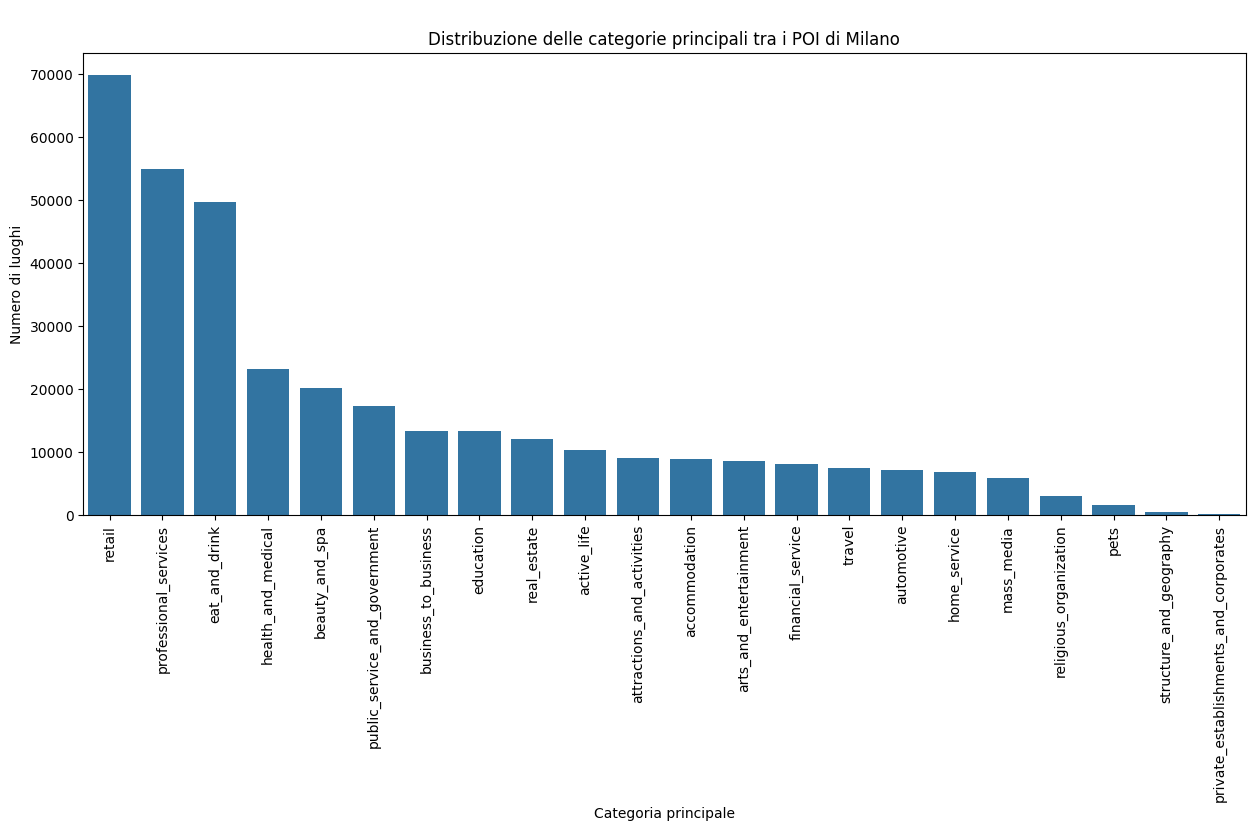

In [ ]:
# Visualizzazione del numero di POI per ogni categoria principale
plt.figure(figsize=(15, 6))
sns.barplot(data=df_category_counts, x='main_category', y='count')
plt.xlabel("Categoria principale")
plt.xticks(rotation=90)
plt.ylabel("Numero di luoghi")
plt.title("\nDistribuzione delle categorie principali tra i POI di Milano")
plt.show()

In [ ]:
# Visualizzazione del numero di POI per ogni sottocategoria
for main_category in main_categories:
    subset = primary_categories[primary_categories['main_category'] == main_category]
    subcategory_counts = subset['category'].value_counts()
    df_subcategory_counts = subcategory_counts.reset_index()
    df_subcategory_counts.columns = ['subcategory', 'count']

    if not subcategory_counts.empty:
        plt.figure(figsize=(30, 6))
        sns.barplot(data=df_subcategory_counts, x='subcategory', y='count')
        plt.xticks(rotation=90)
        plt.xlabel("Sottocategoria")
        plt.ylabel("Numero di luoghi")
        plt.title(f"\nDistribuzione delle sottocategorie per {main_category} tra i POI di Milano")
        plt.show()
        print('\n')

Output hidden; open in https://colab.research.google.com to view.

#### 1.5.2 Analisi del campo confidence

In [ ]:
%%sql
SELECT
    COUNT(*) AS num_poi,
    CAST(SUM(CASE WHEN confidence >= 0.1 THEN 1 ELSE 0 END) AS INT) AS conf_10,
    CAST(SUM(CASE WHEN confidence >= 0.2 THEN 1 ELSE 0 END) AS INT) AS conf_20,
    CAST(SUM(CASE WHEN confidence >= 0.3 THEN 1 ELSE 0 END) AS INT) AS conf_30,
    CAST(SUM(CASE WHEN confidence >= 0.4 THEN 1 ELSE 0 END) AS INT) AS conf_40,
    CAST(SUM(CASE WHEN confidence >= 0.5 THEN 1 ELSE 0 END) AS INT) AS conf_50,
    CAST(SUM(CASE WHEN confidence >= 0.6 THEN 1 ELSE 0 END) AS INT) AS conf_60,
    CAST(SUM(CASE WHEN confidence >= 0.7 THEN 1 ELSE 0 END) AS INT) AS conf_70,
    CAST(SUM(CASE WHEN confidence >= 0.8 THEN 1 ELSE 0 END) AS INT) AS conf_80,
    CAST(SUM(CASE WHEN confidence >= 0.9 THEN 1 ELSE 0 END) AS INT) AS conf_90
FROM places;

num_poi  conf_10  conf_20  conf_30  conf_40  conf_50  conf_60  conf_70  \
0   350832   350568   350568   306150   293886   283224   282306   271902   

   conf_80  conf_90  
0   228450   214368

In [ ]:
%%sql confidence_classes <<
SELECT
    CASE
        WHEN confidence <= 0.2 THEN 'Molto bassa (0-0.2)'
        WHEN confidence > 0.2 AND confidence <= 0.4 THEN 'Bassa (0.2-0.4)'
        WHEN confidence > 0.4 AND confidence <= 0.6 THEN 'Media (0.4-0.6)'
        WHEN confidence > 0.6 AND confidence <= 0.8 THEN 'Alta (0.6-0.8)'
        ELSE 'Molto alta (0.8-1)'
    END AS confidence_class,
    COUNT(*) AS num_poi
FROM places
GROUP BY confidence_class;

In [ ]:
# Ordinamento delle classi di confidenza
category_order = ['Molto bassa (0-0.2)', 'Bassa (0.2-0.4)', 'Media (0.4-0.6)',
                  'Alta (0.6-0.8)', 'Molto alta (0.8-1)']

confidence_classes['confidence_class'] = pd.Categorical(confidence_classes['confidence_class'], categories=category_order, ordered=True)
confidence_classes = confidence_classes.sort_values('confidence_class')
display(confidence_classes)

confidence_class  num_poi
4  Molto bassa (0-0.2)      264
3      Bassa (0.2-0.4)    56682
2      Media (0.4-0.6)    11580
1       Alta (0.6-0.8)    53856
0   Molto alta (0.8-1)   228450

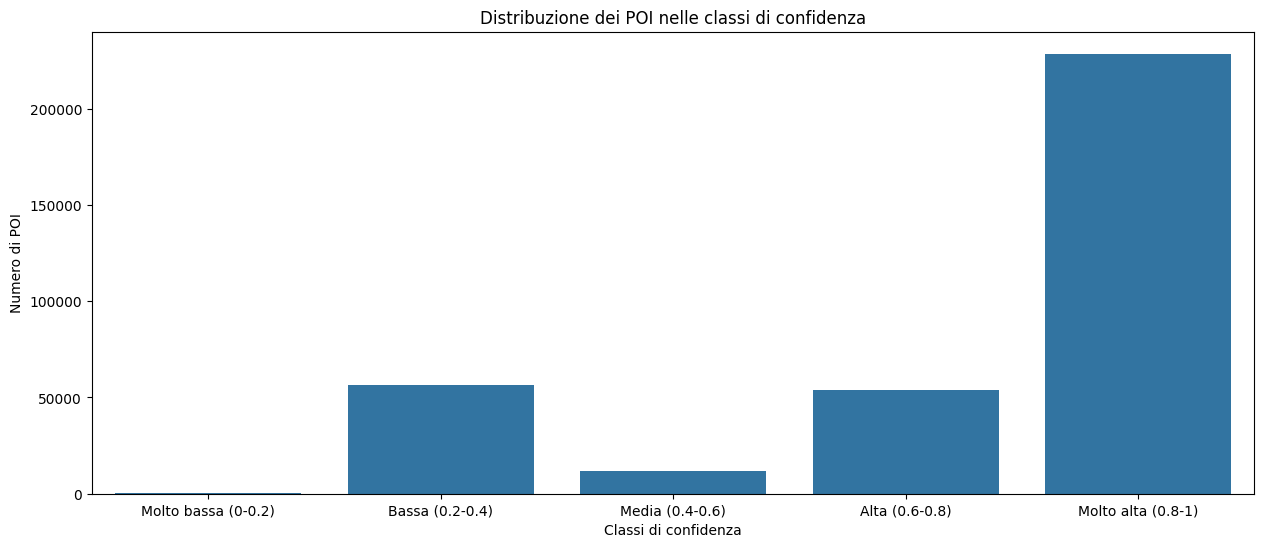

In [ ]:
# Visualizzazione delle classi di confidenza
plt.figure(figsize=(15, 6))
sns.barplot(data=confidence_classes, x="confidence_class", y="num_poi")
plt.xlabel("Classi di confidenza")
plt.ylabel("Numero di POI")
plt.title("Distribuzione dei POI nelle classi di confidenza")
plt.show()

### 1.6 Visualizzazione della mappa dei POI

In [ ]:
%%sql coordinates <<
SELECT id, ST_X(geometry) AS longitude, ST_Y(geometry) AS latitude, names, categories, confidence, addresses
FROM places

In [ ]:
# prompt: Salva coordinates in un file coordinates.csv

# Assuming you have a 'coordinates' DataFrame from the provided SQL query
# Replace this with your actual DataFrame if it's different
# Example DataFrame (replace with your actual 'coordinates' DataFrame)
import pandas as pd


# Funzione per determinare la main category
def get_main_category(category):
    # Verifica se la categoria √® una sub-category e restituisce la main category
    for main_category, sub_cat_dict in standard_categories.items():
        if category in sub_cat_dict:
            return main_category
    # Se la categoria √® gi√† una main category, la restituiamo tale e quale
    if category in main_categories:
        return category
    # Se la categoria non √® n√© una main n√© una sub category, la restituiamo invariata
    return category



# Crea la nuova colonna 'main_category' applicando la funzione
coordinates['main_category'] = coordinates['categories'].apply(get_main_category)

def extract_primary_category(main_category_str):
    try:
        # Carica la stringa JSON
        category_data = json.loads(main_category_str)
        # Estrai il valore sotto "primary"
        return category_data.get('primary', None)
    except (json.JSONDecodeError, TypeError):
        return None

# Applica la funzione alla colonna 'main_category'
coordinates['main_category'] = coordinates['main_category'].apply(extract_primary_category)

def find_main_category(category, sub_cat_dict):
    """
    Funzione ricorsiva per trovare la main category di una sub-category.
    Se la categoria √® una sub-category, restituisce la main category corrispondente.
    Se la categoria √® sconosciuta, restituisce "unknown".
    """
    for main_category, sub_dict in sub_cat_dict.items():
        # Se la categoria √® una main category, la restituisce direttamente
        if category == main_category:
            return main_category

        # Se la categoria √® una sub-category diretta, restituisce la main category corrispondente
        if category in sub_dict:
            return main_category

        # üîÑ Controlliamo se la categoria √® in una sotto-sotto categoria
        for sub_category, nested_dict in sub_dict.items():
            if isinstance(nested_dict, dict):  # Se √® un dizionario, continuiamo la ricerca
                if category in nested_dict:
                    return main_category  # Trovato, restituisce la main category
                else:
                    # üîÑ Ricorsione per cercare nei livelli pi√π profondi
                    result = find_main_category(category, {sub_category: nested_dict})
                    if result and result != "unknown":
                        return main_category

    return "unknown"  # Se non viene trovata in nessun livello, restituisce "unknown"

# Applica la funzione di sostituzione
coordinates['main_category'] = coordinates['main_category'].apply(
    lambda cat: find_main_category(cat, standard_categories) if pd.notna(cat) else "unknown"
)

# Stampa il risultato
print(coordinates)

def find_group_category(main_category, category_tree):
    """
    Trova il 'group_category' per una data 'main_category'.
    Se non trova una corrispondenza, restituisce 'unknown'.
    """
    for group, main_list in category_tree.items():
        if main_category in main_list:
            return group
    return "unknown"  # Se la categoria non √® trovata, restituiamo "unknown"

# Applichiamo la funzione alla colonna 'main_category' per creare la nuova colonna 'group_category'
coordinates['group_category'] = coordinates['main_category'].apply(
    lambda cat: find_group_category(cat, albero) if pd.notna(cat) else "unknown"
)

# Stampa il risultato
print(coordinates)




                                      id  longitude   latitude  \
0       08f8e62c50383b8803fcf09567974e40   9.221615  45.490589   
1       08f98f0b29285aea03652e222d82119b   9.202782  45.474894   
2       08f489ac041b5b32030f50bb7abb55ce   9.206607  45.414422   
3       08f26c83b324d08903167da4a6151af3   9.246021  45.470652   
4       08f6d693050420a903d8dc9a14652b7d   9.167222  45.489444   
...                                  ...        ...        ...   
350827  08f1ea5730134926033c31cb09db6091   9.177689  45.416579   
350828  08f1ea58f664c300035eabd36c467577   9.235662  45.490585   
350829  08f1ea5128458888031d43eb3e584b21   9.101926  45.477619   
350830  08f1f8b232473501037caa739acdfda8   9.251258  45.509002   
350831  08f1f1d48970050003c9673a0902cfc1   9.175921  45.452144   

                                                    names  \
0       {"primary":"Arteinparete Deco","common":null,"...   
1           {"primary":"IFDM","common":null,"rules":null}   
2       {"primary":"Spaz

In [ ]:
# Salva il DataFrame 'coordinates' in un file CSV
coordinates.to_csv('', index=False)

In [ ]:
map_poi = folium.Map(location=[45.4636707, 9.1881263], zoom_start=12)

# Specifiche di ogni POI
for _, row in coordinates.iterrows():
    names = json.loads(row['names'])
    name = names.get('primary')
    addresses = json.loads(row['addresses'])
    address = addresses[0].get('freeform') + ', ' +  addresses[0].get('postcode')
    categories = json.loads(row['categories'])
    category = categories.get('primary')

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=0.1,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.9,
        tooltip=f"<b>Nome:</b> {name}<br><b>Indirizzo:</b> {address}<br><b>Categoria:</b> {category}<br><b>Confidenza:</b> {row['confidence']}"
    ).add_to(map_poi)

# Visualizzazione della mappa
print('\nMappa dei POI di Milano:\n')
map_poi

# Salvataggio della mappa
# map_poi.save('/content/drive/MyDrive/Stage/file/poi/poi_milano_map.html')


Mappa dei POI di Milano:



KeyboardInterrupt: 